In [1]:
%load_ext autoreload

In [2]:
%autoreload 
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

from utilities import create_data as create
from pandas_dq import dq_report, Fix_DQ, dc_report

In [3]:
# Create training data
Data = create.CreateTrainingData()
df = Data.create_training_data(use_mean_values=False)
df_mean = Data.create_training_data(use_mean_values=True) # Hourly mean values

# Create test data
X_test = create.create_test_data(use_mean_values=False)
X_test_mean = create.create_test_data(use_mean_values=True) # Hourly mean values

In [4]:
df.head()

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
date_forecast                                                        
2019-06-02 22:00:00             7.7                   1.230          
2019-06-02 22:15:00             7.7                   1.229          
2019-06-02 22:30:00             7.7                   1.228          
2019-06-02 22:45:00             7.7                   1.226          
2019-06-02 23:00:00             7.7                   1.225          

                     ceiling_height_agl:m  clear_sky_energy_1h:J  \
date_forecast                                                      
2019-06-02 22:00:00       1744.900024               0.0            
2019-06-02 22:15:00       1734.000000               0.0            
2019-06-02 22:30:00       1723.500000               0.0            
2019-06-02 22:45:00       1713.400024               0.0            
2019-06-02 23:00:00       1703.599976               0.0            

                     clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  \
date_forecast                                                             
2019-06-02 22:00:00        0.0           1744.900024          0.0         
2019-06-02 22:15:00        0.0           1734.000000          0.0         
2019-06-02 22:30:00        0.0           1723.500000          0.0         
2019-06-02 22:45:00        0.0           1713.400024          0.0         
2019-06-02 23:00:00        0.0           1703.599976          0.0         

                     dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
date_forecast                                                          
2019-06-02 22:00:00    280.299988         0.0              0.0         
2019-06-02 22:15:00    280.299988         0.0              0.0         
2019-06-02 22:30:00    280.299988         0.0              0.0         
2019-06-02 22:45:00    280.299988         0.0              0.0         
2019-06-02 23:00:00    280.299988         0.0              0.0         

                     direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  \
date_forecast                                                                 
2019-06-02 22:00:00       0.0            0.0               98.699997          
2019-06-02 22:15:00       0.0            0.0               99.000000          
2019-06-02 22:30:00       0.0            0.0               99.199997          
2019-06-02 22:45:00       0.0            0.0               99.400002          
2019-06-02 23:00:00       0.0            0.0               99.599998          

                     elevation:m  fresh_snow_12h:cm  fresh_snow_1h:cm  \
date_forecast                                                           
2019-06-02 22:00:00      6.0             0.0                0.0         
2019-06-02 22:15:00      6.0             0.0                0.0         
2019-06-02 22:30:00      6.0             0.0                0.0         
2019-06-02 22:45:00      6.0             0.0                0.0         
2019-06-02 23:00:00      6.0             0.0                0.0         

                     fresh_snow_24h:cm  fresh_snow_3h:cm  fresh_snow_6h:cm  \
date_forecast                                                                
2019-06-02 22:00:00         0.0                0.0               0.0         
2019-06-02 22:15:00         0.0                0.0               0.0         
2019-06-02 22:30:00         0.0                0.0               0.0         
2019-06-02 22:45:00         0.0                0.0               0.0         
2019-06-02 23:00:00         0.0                0.0               0.0         

                     is_day:idx  is_in_shadow:idx  msl_pressure:hPa  \
date_forecast                                                         
2019-06-02 22:00:00      0.0            1.0           1006.799988     
2019-06-02 22:15:00      0.0            1.0           1006.500000     
2019-06-02 22:30:00      0.0            1.0           1006.099976     
2019-06-02 22:45:00      0.0            1.0           

In [5]:
X_test.head()

date_calc       absolute_humidity_2m:gm3  \
date_forecast                                                       
2023-05-01 00:00:00 2023-04-30 07:00:04             4.4             
2023-05-01 00:15:00 2023-04-30 07:00:04             4.3             
2023-05-01 00:30:00 2023-04-30 07:00:04             4.3             
2023-05-01 00:45:00 2023-04-30 07:00:04             4.3             
2023-05-01 01:00:00 2023-04-30 07:00:04             4.3             

                     air_density_2m:kgm3  ceiling_height_agl:m  \
date_forecast                                                    
2023-05-01 00:00:00         1.286              912.700012        
2023-05-01 00:15:00         1.287              912.700012        
2023-05-01 00:30:00         1.287              912.700012        
2023-05-01 00:45:00         1.287              912.700012        
2023-05-01 01:00:00         1.287                     NaN        

                     clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
date_forecast                                                                   
2023-05-01 00:00:00           0.0                 0.0           1041.199951     
2023-05-01 00:15:00           0.0                 0.0           1054.800049     
2023-05-01 00:30:00           0.0                 0.0           1068.300049     
2023-05-01 00:45:00           0.0                 0.0           1081.900024     
2023-05-01 01:00:00           0.0                 0.0           1095.400024     

                     dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
date_forecast                                                         
2023-05-01 00:00:00        0.0          271.700012         0.0        
2023-05-01 00:15:00        0.0          271.700012         0.0        
2023-05-01 00:30:00        0.0          271.600006         0.0        
2023-05-01 00:45:00        0.0          271.600006         0.0        
2023-05-01 01:00:00        0.0          271.600006         0.0        

                     diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
date_forecast                                                          
2023-05-01 00:00:00         0.0             0.0            0.0         
2023-05-01 00:15:00         0.0             0.0            0.0         
2023-05-01 00:30:00         0.0             0.0            0.0         
2023-05-01 00:45:00         0.0             0.0            0.0         
2023-05-01 01:00:00         0.0             0.0            0.0         

                     effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
date_forecast                                                                  
2023-05-01 00:00:00         80.699997             6.0             0.0          
2023-05-01 00:15:00         77.000000             6.0             0.0          
2023-05-01 00:30:00         73.099998             6.0             0.0          
2023-05-01 00:45:00         69.000000             6.0             0.0          
2023-05-01 01:00:00         64.500000             6.0             0.0          

                     fresh_snow_1h:cm  fresh_snow_24h:cm  fresh_snow_3h:cm  \
date_forecast                                                                
2023-05-01 00:00:00         0.0               0.0                0.0         
2023-05-01 00:15:00         0.0               0.0                0.0         
2023-05-01 00:30:00         0.0               0.0                0.0         
2023-05-01 00:45:00         0.0               0.0                0.0         
2023-05-01 01:00:00         0.0               0.0                0.0         

                     fresh_snow_6h:cm  is_day:idx  is_in_shadow:idx  \
date_forecast                                                         
2023-05-01 00:00:00         0.0            0.0            1.0         
2023-05-01 00:15:00         0.0            0.0            1.0         
2023-05-01 00:30:00         0.0            0.0            1.0         
2023-05-01 00:45:00         0.0            0

In [6]:
df_mean.head()

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
date_forecast                                                        
2019-06-02 22:00:00            7.700                 1.22825         
2019-06-02 23:00:00            7.700                 1.22350         
2019-06-03 00:00:00            7.875                 1.21975         
2019-06-03 01:00:00            8.425                 1.21800         
2019-06-03 02:00:00            8.950                 1.21800         

                     ceiling_height_agl:m  clear_sky_energy_1h:J  \
date_forecast                                                      
2019-06-02 22:00:00       1728.949951              0.000000        
2019-06-02 23:00:00       1689.824951              0.000000        
2019-06-03 00:00:00       1563.224976              0.000000        
2019-06-03 01:00:00       1283.425049            208.649994        
2019-06-03 02:00:00       1003.500000          32468.150391        

                     clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  \
date_forecast                                                             
2019-06-02 22:00:00        0.00          1728.949951          0.0         
2019-06-02 23:00:00        0.00          1689.824951          0.0         
2019-06-03 00:00:00        0.00          1563.224976          0.0         
2019-06-03 01:00:00        0.75          1283.425049          0.0         
2019-06-03 02:00:00       23.10          1003.500000          0.0         

                     dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
date_forecast                                                          
2019-06-02 22:00:00    280.299988        0.000            0.000000     
2019-06-02 23:00:00    280.299988        0.000            0.000000     
2019-06-03 00:00:00    280.649994        0.000            0.000000     
2019-06-03 01:00:00    281.674988        0.300          526.775024     
2019-06-03 02:00:00    282.500000       11.975        22068.949219     

                     direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  \
date_forecast                                                                 
2019-06-02 22:00:00      0.00          0.000000            99.074997          
2019-06-02 23:00:00      0.00          0.000000            99.750000          
2019-06-03 00:00:00      0.00          0.000000           100.000000          
2019-06-03 01:00:00      0.00          0.000000           100.000000          
2019-06-03 02:00:00      0.15        282.975006            84.875000          

                     elevation:m  fresh_snow_12h:cm  fresh_snow_1h:cm  \
date_forecast                                                           
2019-06-02 22:00:00      6.0             0.0                0.0         
2019-06-02 23:00:00      6.0             0.0                0.0         
2019-06-03 00:00:00      6.0             0.0                0.0         
2019-06-03 01:00:00      6.0             0.0                0.0         
2019-06-03 02:00:00      6.0             0.0                0.0         

                     fresh_snow_24h:cm  fresh_snow_3h:cm  fresh_snow_6h:cm  \
date_forecast                                                                
2019-06-02 22:00:00         0.0                0.0               0.0         
2019-06-02 23:00:00         0.0                0.0               0.0         
2019-06-03 00:00:00         0.0                0.0               0.0         
2019-06-03 01:00:00         0.0                0.0               0.0         
2019-06-03 02:00:00         0.0                0.0               0.0         

                     is_day:idx  is_in_shadow:idx  msl_pressure:hPa  \
date_forecast                                                         
2019-06-02 22:00:00     0.00            1.0           1006.299988     
2019-06-02 23:00:00     0.00            1.0           1005.200012     
2019-06-03 00:00:00     0.00            1.0           1004.525024     
2019-06-03 01:00:00     0.25            1.0           

In [7]:
X_test_mean.head()

date_calc       absolute_humidity_2m:gm3  \
date_forecast                                                       
2023-05-01 00:00:00 2023-04-30 07:00:04            4.325            
2023-05-01 01:00:00 2023-04-30 07:00:04            4.275            
2023-05-01 02:00:00 2023-04-30 07:00:04            4.150            
2023-05-01 03:00:00 2023-04-30 07:00:04            4.025            
2023-05-01 04:00:00 2023-04-30 07:00:04            3.900            

                     air_density_2m:kgm3  ceiling_height_agl:m  \
date_forecast                                                    
2023-05-01 00:00:00        1.28675              912.700012       
2023-05-01 01:00:00        1.28600             1482.099976       
2023-05-01 02:00:00        1.28375             1791.300049       
2023-05-01 03:00:00        1.28200             2312.875000       
2023-05-01 04:00:00        1.28100             2198.299805       

                     clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
date_forecast                                                                   
2023-05-01 00:00:00           0.000000           0.000          1061.550049     
2023-05-01 01:00:00           0.000000           0.000          1075.100098     
2023-05-01 02:00:00           0.000000           0.000          1200.400024     
2023-05-01 03:00:00       10124.424805          11.675          1179.849976     
2023-05-01 04:00:00      141748.593750          76.875           920.049988     

                     dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
date_forecast                                                         
2023-05-01 00:00:00        0.0          271.650024       0.000000     
2023-05-01 01:00:00        0.0          271.450012       0.000000     
2023-05-01 02:00:00        0.0          271.049988       0.000000     
2023-05-01 03:00:00        0.0          270.649994       9.375000     
2023-05-01 04:00:00        0.0          270.375000      47.400002     

                     diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
date_forecast                                                          
2023-05-01 00:00:00         0.000000      0.000000        0.000000     
2023-05-01 01:00:00         0.000000      0.000000        0.000000     
2023-05-01 02:00:00         0.000000      0.000000        0.000000     
2023-05-01 03:00:00     16845.226562      2.100000     3765.350098     
2023-05-01 04:00:00    102209.703125     25.450001    49571.199219     

                     effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
date_forecast                                                                  
2023-05-01 00:00:00         74.949997             6.0             0.0          
2023-05-01 01:00:00         77.474998             6.0             0.0          
2023-05-01 02:00:00         88.099998             6.0             0.0          
2023-05-01 03:00:00         68.599998             6.0             0.0          
2023-05-01 04:00:00         66.300003             6.0             0.0          

                     fresh_snow_1h:cm  fresh_snow_24h:cm  fresh_snow_3h:cm  \
date_forecast                                                                
2023-05-01 00:00:00         0.0               0.0                0.0         
2023-05-01 01:00:00         0.0               0.0                0.0         
2023-05-01 02:00:00         0.0               0.0                0.0         
2023-05-01 03:00:00         0.0               0.0                0.0         
2023-05-01 04:00:00         0.0               0.0                0.0         

                     fresh_snow_6h:cm  is_day:idx  is_in_shadow:idx  \
date_forecast                                                         
2023-05-01 00:00:00         0.0           0.00            1.0         
2023-05-01 01:00:00         0.0           0.00            1.0         
2023-05-01 02:00:00         0.0           0.00            1.0         
2023-05-01 03:00:00         0.0           0.

The mean data has filled the missing values from the provided data with NaNs and/or zeros, removing those entries

In [8]:
# in df_mean and X_test_mean remove the rows where all values are NaN
df_mean = df_mean.dropna(how='all')
X_test_mean = X_test_mean.dropna(how='all')
df_mean.to_csv('test.csv')

#### The dataframe contains all data for each builiding, we now that the distinguisihing feature is elevation so we're using that to create a building feature for easy data management

In [9]:
# add a new feature to the training data that is named building: It is either 0, 1, 2 depending on the elevation of the building where 0 is 6, 1 is 7 and 2 is 24
df['building'] = df['elevation:m'].apply(lambda x: 0 if x == 6 else (1 if x == 7 else 2))
# add a new feature to the test data that is named building: It is either 0, 1, 2 depending on the elevation of the building where 0 is 6, 1 is 7 and 2 is 24
X_test['building'] = X_test['elevation:m'].apply(lambda x: 0 if x == 6 else (1 if x == 7 else 2))

# add a new feature to the training data that is named building: It is either 0, 1, 2 depending on the elevation of the building where 0 is 6, 1 is 7 and 2 is 24
df_mean['building'] = df_mean['elevation:m'].apply(lambda x: 0 if x == 6 else (1 if x == 7 else 2))
# add a new feature to the test data that is named building: It is either 0, 1, 2 depending on the elevation of the building where 0 is 6, 1 is 7 and 2 is 24
X_test_mean['building'] = X_test_mean['elevation:m'].apply(lambda x: 0 if x == 6 else (1 if x == 7 else 2))

In [10]:
df

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
date_forecast                                                        
2019-06-02 22:00:00             7.7                   1.230          
2019-06-02 22:15:00             7.7                   1.229          
2019-06-02 22:30:00             7.7                   1.228          
2019-06-02 22:45:00             7.7                   1.226          
2019-06-02 23:00:00             7.7                   1.225          
...                                       ...                  ...   
2023-04-30 22:45:00             4.4                   1.280          
2023-04-30 23:00:00             4.4                   1.280          
2023-04-30 23:15:00             4.4                   1.280          
2023-04-30 23:30:00             4.4                   1.280          
2023-04-30 23:45:00             4.4                   1.279          

                     ceiling_height_agl:m  clear_sky_energy_1h:J  \
date_forecast                                                      
2019-06-02 22:00:00       1744.900024               0.0            
2019-06-02 22:15:00       1734.000000               0.0            
2019-06-02 22:30:00       1723.500000               0.0            
2019-06-02 22:45:00       1713.400024               0.0            
2019-06-02 23:00:00       1703.599976               0.0            
...                                   ...                    ...   
2023-04-30 22:45:00       1034.599976               0.0            
2023-04-30 23:00:00        897.200012               0.0            
2023-04-30 23:15:00       1288.699951               0.0            
2023-04-30 23:30:00       1680.300049               0.0            
2023-04-30 23:45:00       2071.800049               0.0            

                     clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  \
date_forecast                                                             
2019-06-02 22:00:00        0.0           1744.900024          0.0         
2019-06-02 22:15:00        0.0           1734.000000          0.0         
2019-06-02 22:30:00        0.0           1723.500000          0.0         
2019-06-02 22:45:00        0.0           1713.400024          0.0         
2019-06-02 23:00:00        0.0           1703.599976          0.0         
...                              ...               ...              ...   
2023-04-30 22:45:00        0.0            562.299988          0.0         
2023-04-30 23:00:00        0.0            569.500000          0.0         
2023-04-30 23:15:00        0.0            562.299988          0.0         
2023-04-30 23:30:00        0.0            555.099976          0.0         
2023-04-30 23:45:00        0.0            547.799988          0.0         

                     dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
date_forecast                                                          
2019-06-02 22:00:00    280.299988         0.0              0.0         
2019-06-02 22:15:00    280.299988         0.0              0.0         
2019-06-02 22:30:00    280.299988         0.0              0.0         
2019-06-02 22:45:00    280.299988         0.0              0.0         
2019-06-02 23:00:00    280.299988         0.0              0.0         
...                             ...            ...               ...   
2023-04-30 22:45:00    272.000000         0.0              0.0         
2023-04-30 23:00:00    272.000000         0.0              0.0         
2023-04-30 23:15:00    272.000000         0.0              0.0         
2023-04-30 23:30:00    271.899994         0.0              0.0         
2023-04-30 23:45:00    271.899994         0.0              0.0         

                     direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  \
date_forecast                                                                 
2019-06-02 22:00:00       0.0            0.0               98.699997          
2019-06-02 22:15:00       0.0            0.0               99.000000       

In [11]:
X_test

date_calc       absolute_humidity_2m:gm3  \
date_forecast                                                       
2023-05-01 00:00:00 2023-04-30 07:00:04             4.4             
2023-05-01 00:15:00 2023-04-30 07:00:04             4.3             
2023-05-01 00:30:00 2023-04-30 07:00:04             4.3             
2023-05-01 00:45:00 2023-04-30 07:00:04             4.3             
2023-05-01 01:00:00 2023-04-30 07:00:04             4.3             
...                                 ...                       ...   
2023-07-03 22:45:00 2023-07-02 07:00:31             9.0             
2023-07-03 23:00:00 2023-07-02 07:00:31             9.0             
2023-07-03 23:15:00 2023-07-02 07:00:31             9.0             
2023-07-03 23:30:00 2023-07-02 07:00:31             8.9             
2023-07-03 23:45:00 2023-07-02 07:00:31             8.9             

                     air_density_2m:kgm3  ceiling_height_agl:m  \
date_forecast                                                    
2023-05-01 00:00:00         1.286               912.700012       
2023-05-01 00:15:00         1.287               912.700012       
2023-05-01 00:30:00         1.287               912.700012       
2023-05-01 00:45:00         1.287               912.700012       
2023-05-01 01:00:00         1.287                      NaN       
...                                  ...                   ...   
2023-07-03 22:45:00         1.207              2003.500000       
2023-07-03 23:00:00         1.207              2005.599976       
2023-07-03 23:15:00         1.207              2005.500000       
2023-07-03 23:30:00         1.207              2005.500000       
2023-07-03 23:45:00         1.207              2005.500000       

                     clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
date_forecast                                                                   
2023-05-01 00:00:00           0.0                 0.0           1041.199951     
2023-05-01 00:15:00           0.0                 0.0           1054.800049     
2023-05-01 00:30:00           0.0                 0.0           1068.300049     
2023-05-01 00:45:00           0.0                 0.0           1081.900024     
2023-05-01 01:00:00           0.0                 0.0           1095.400024     
...                                    ...              ...               ...   
2023-07-03 22:45:00           0.0                 0.0           1573.000000     
2023-07-03 23:00:00           0.0                 0.0           1471.000000     
2023-07-03 23:15:00           0.0                 0.0           1346.900024     
2023-07-03 23:30:00           0.0                 0.0           1222.800049     
2023-07-03 23:45:00           0.0                 0.0           1098.699951     

                     dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
date_forecast                                                         
2023-05-01 00:00:00        0.0          271.700012         0.0        
2023-05-01 00:15:00        0.0          271.700012         0.0        
2023-05-01 00:30:00        0.0          271.600006         0.0        
2023-05-01 00:45:00        0.0          271.600006         0.0        
2023-05-01 01:00:00        0.0          271.600006         0.0        
...                              ...             ...            ...   
2023-07-03 22:45:00        0.0          282.600006         0.0        
2023-07-03 23:00:00        0.0          282.500000         0.0        
2023-07-03 23:15:00        0.0          282.500000         0.0        
2023-07-03 23:30:00        0.0          282.500000         0.0        
2023-07-03 23:45:00        0.0          282.399994         0.0        

                     diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
date_forecast                                                          
2023-05-01 00:00:00         0.0             0.0            0.0         
2023-05-01 00:15:00         0.0             0.0            0.0         
20

In [12]:
df_mean

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
date_forecast                                                        
2019-06-02 22:00:00            7.700                 1.22825         
2019-06-02 23:00:00            7.700                 1.22350         
2019-06-03 00:00:00            7.875                 1.21975         
2019-06-03 01:00:00            8.425                 1.21800         
2019-06-03 02:00:00            8.950                 1.21800         
...                                       ...                  ...   
2023-04-30 19:00:00            4.400                 1.27550         
2023-04-30 20:00:00            4.400                 1.27850         
2023-04-30 21:00:00            4.400                 1.27900         
2023-04-30 22:00:00            4.400                 1.27975         
2023-04-30 23:00:00            4.400                 1.27975         

                     ceiling_height_agl:m  clear_sky_energy_1h:J  \
date_forecast                                                      
2019-06-02 22:00:00       1728.949951              0.000000        
2019-06-02 23:00:00       1689.824951              0.000000        
2019-06-03 00:00:00       1563.224976              0.000000        
2019-06-03 01:00:00       1283.425049            208.649994        
2019-06-03 02:00:00       1003.500000          32468.150391        
...                                   ...                    ...   
2023-04-30 19:00:00       1456.574951          84010.148438        
2023-04-30 20:00:00       1476.349976           2206.800049        
2023-04-30 21:00:00       1516.300049              0.000000        
2023-04-30 22:00:00       1240.599976              0.000000        
2023-04-30 23:00:00       1484.500000              0.000000        

                     clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  \
date_forecast                                                             
2019-06-02 22:00:00       0.000          1728.949951          0.0         
2019-06-02 23:00:00       0.000          1689.824951          0.0         
2019-06-03 00:00:00       0.000          1563.224976          0.0         
2019-06-03 01:00:00       0.750          1283.425049          0.0         
2019-06-03 02:00:00      23.100          1003.500000          0.0         
...                              ...               ...              ...   
2023-04-30 19:00:00       4.175           551.224976          0.0         
2023-04-30 20:00:00       0.000           564.099976          0.0         
2023-04-30 21:00:00       0.000           578.700012          0.0         
2023-04-30 22:00:00       0.000           551.500000          0.0         
2023-04-30 23:00:00       0.000           558.674988          0.0         

                     dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
date_forecast                                                          
2019-06-02 22:00:00    280.299988        0.000            0.000000     
2019-06-02 23:00:00    280.299988        0.000            0.000000     
2019-06-03 00:00:00    280.649994        0.000            0.000000     
2019-06-03 01:00:00    281.674988        0.300          526.775024     
2019-06-03 02:00:00    282.500000       11.975        22068.949219     
...                             ...            ...               ...   
2023-04-30 19:00:00    272.024994        2.775        54774.000000     
2023-04-30 20:00:00    271.950012        0.000         4984.049805     
2023-04-30 21:00:00    271.899994        0.000            0.000000     
2023-04-30 22:00:00    271.950012        0.000            0.000000     
2023-04-30 23:00:00    271.950012        0.000            0.000000     

                     direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  \
date_forecast                                                                 
2019-06-02 22:00:00      0.00           0.000000           99.074997          
2019-06-02 23:00:00      0.00           0.000000           99.750000       

In [13]:
X_test_mean

date_calc       absolute_humidity_2m:gm3  \
date_forecast                                                       
2023-05-01 00:00:00 2023-04-30 07:00:04            4.325            
2023-05-01 01:00:00 2023-04-30 07:00:04            4.275            
2023-05-01 02:00:00 2023-04-30 07:00:04            4.150            
2023-05-01 03:00:00 2023-04-30 07:00:04            4.025            
2023-05-01 04:00:00 2023-04-30 07:00:04            3.900            
...                                 ...                       ...   
2023-07-03 19:00:00 2023-07-02 07:00:31            8.400            
2023-07-03 20:00:00 2023-07-02 07:00:31            8.600            
2023-07-03 21:00:00 2023-07-02 07:00:31            8.875            
2023-07-03 22:00:00 2023-07-02 07:00:31            9.000            
2023-07-03 23:00:00 2023-07-02 07:00:31            8.950            

                     air_density_2m:kgm3  ceiling_height_agl:m  \
date_forecast                                                    
2023-05-01 00:00:00        1.28675              912.700012       
2023-05-01 01:00:00        1.28600             1482.099976       
2023-05-01 02:00:00        1.28375             1791.300049       
2023-05-01 03:00:00        1.28200             2312.875000       
2023-05-01 04:00:00        1.28100             2198.299805       
...                                  ...                   ...   
2023-07-03 19:00:00        1.19675             3493.649902       
2023-07-03 20:00:00        1.20000             3078.750000       
2023-07-03 21:00:00        1.20350             2308.399902       
2023-07-03 22:00:00        1.20650             2000.449951       
2023-07-03 23:00:00        1.20700             2005.525024       

                     clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
date_forecast                                                                   
2023-05-01 00:00:00           0.000000          0.000000        1061.550049     
2023-05-01 01:00:00           0.000000          0.000000        1075.100098     
2023-05-01 02:00:00           0.000000          0.000000        1200.400024     
2023-05-01 03:00:00       10124.424805         11.675000        1179.849976     
2023-05-01 04:00:00      141748.593750         76.875000         920.049988     
...                                    ...              ...               ...   
2023-07-03 19:00:00      475981.375000         84.775002        1967.375000     
2023-07-03 20:00:00      183261.343750         24.549999        1449.500000     
2023-07-03 21:00:00       36831.074219          1.225000        1543.650024     
2023-07-03 22:00:00         344.575012          0.000000        1725.949951     
2023-07-03 23:00:00           0.000000          0.000000        1284.849976     

                     dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
date_forecast                                                         
2023-05-01 00:00:00        0.0          271.650024       0.000000     
2023-05-01 01:00:00        0.0          271.450012       0.000000     
2023-05-01 02:00:00        0.0          271.049988       0.000000     
2023-05-01 03:00:00        0.0          270.649994       9.375000     
2023-05-01 04:00:00        0.0          270.375000      47.400002     
...                              ...             ...            ...   
2023-07-03 19:00:00        0.0          281.700012      32.200001     
2023-07-03 20:00:00        0.0          282.024994      13.875000     
2023-07-03 21:00:00        0.0          282.350006       1.250000     
2023-07-03 22:00:00        0.0          282.600006       0.000000     
2023-07-03 23:00:00        0.0          282.475006       0.000000     

                     diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
date_forecast                                                          
2023-05-01 00:00:00         0.000000      0.000000        0.000000     
2023-05-01 01:00:00         0.000000      0.000000        0.000000     
20

# Rough analyse using pandas_dq

In [14]:
dqr = dq_report(df, target='pv_measurement', csv_engine='pandas', html=False, verbose=1)

small summary:

In [15]:
_ = dq_report(df, target='pv_measurement', verbose=0)

This is a summary report. Change verbose to 1 to see more details on each DQ issue.


In [16]:
_ = dq_report(df_mean, target='pv_measurement', verbose=1, html=False)

    Alert: Dropping 52 duplicate rows can sometimes cause column data types to change to object. Double-check!


In [17]:
df_mean.isna().sum()

absolute_humidity_2m:gm3             72
air_density_2m:kgm3                  72
ceiling_height_agl:m              17242
clear_sky_energy_1h:J                72
clear_sky_rad:W                      72
cloud_base_agl:m                   7311
dew_or_rime:idx                      72
dew_point_2m:K                       72
diffuse_rad:W                        72
diffuse_rad_1h:J                     72
direct_rad:W                         72
direct_rad_1h:J                      72
effective_cloud_cover:p              72
elevation:m                          72
fresh_snow_12h:cm                    72
fresh_snow_1h:cm                     72
fresh_snow_24h:cm                    72
fresh_snow_3h:cm                     72
fresh_snow_6h:cm                     72
is_day:idx                           72
is_in_shadow:idx                     72
msl_pressure:hPa                     72
precip_5min:mm                       72
precip_type_5min:idx                 72
pressure_100m:hPa                    72


Seems like some of the missing features survived the first purge, these remaining missing values seems to hava a corresponding pv_measurement so that explains it. They are fro january 2023 so shoul not be to critical to remove.

In [18]:
# remove the rows where most of the values are NaN
df = df.dropna(thresh=10)
X_test = X_test.dropna(thresh=10)
df_mean = df_mean.dropna(thresh=10)
X_test_mean = X_test_mean.dropna(thresh=10)

In [19]:
df_mean.isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m              17170
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   7239
dew_or_rime:idx                       0
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
precip_type_5min:idx                  0
pressure_100m:hPa                     0


# Check test data

In [20]:
_ = dq_report(X_test, verbose=1)

In [21]:
_ = dq_report(X_test, verbose=0)

This is a summary report. Change verbose to 1 to see more details on each DQ issue.


## Remove some features based on the reports

In [22]:
drop_features = ['snow_density:kgm3']
# drop the features in drop_features list
df = df.drop(drop_features, axis=1)
X_test = X_test.drop(drop_features, axis=1)
df_mean = df_mean.drop(drop_features, axis=1)
X_test_mean = X_test_mean.drop(drop_features, axis=1)

See that snow_depth:cm, snow_drift:idx and snow_melt_10min:mm has zero variance and therefore are of little interest

In [23]:
# drop snow_depth:cm, snow_drift:idx and snow_melt_10min:mm
df = df.drop(columns=['snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm'])
X_test = X_test.drop(columns=['snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm'])

In [24]:
_ = dq_report(df, verbose=1)

In [25]:
_ = dq_report(df_mean, verbose=1)

the mean data should not be missing pv_measurements as it is supposed to cover whole hours, but it seems like there are som entries without pv_measurements now. We remove those.

In [26]:
# from df_mean remove the rows where pv_measurement is NaN
df_mean = df_mean.dropna(subset=['pv_measurement'])

In [27]:
df_mean.isna().sum()    

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m              16417
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   6738
dew_or_rime:idx                       0
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
precip_type_5min:idx                  0
pressure_100m:hPa                     0


In [28]:
_ = dq_report(X_test, verbose=1)

In [29]:
# check for missing values in the dataframe
df.isnull().sum()


absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               73146
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                   30912
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min:idx                   0
pressure_100m:hP

In [30]:
X_test.isnull().sum()

date_calc                            0
absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m              2397
clear_sky_energy_1h:J                0
clear_sky_rad:W                      0
cloud_base_agl:m                   950
dew_or_rime:idx                      0
dew_point_2m:K                       0
diffuse_rad:W                        0
diffuse_rad_1h:J                     0
direct_rad:W                         0
direct_rad_1h:J                      0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
is_day:idx                           0
is_in_shadow:idx                     0
msl_pressure:hPa                     0
precip_5min:mm                       0
precip_type_5min:idx                 0
pressure_100m:hPa        

Seemes like it's just ceiling_height_agl:m and cloud_base_agl:m that misses data

# More in-depth analysis using sweetviz

In [31]:
# sv_report = sv.analyze(df, target_feat='pv_measurement')
sv_report_mean = sv.analyze(df_mean, target_feat='pv_measurement')

                                             |          | [  0%]   00:00 -> (? left)


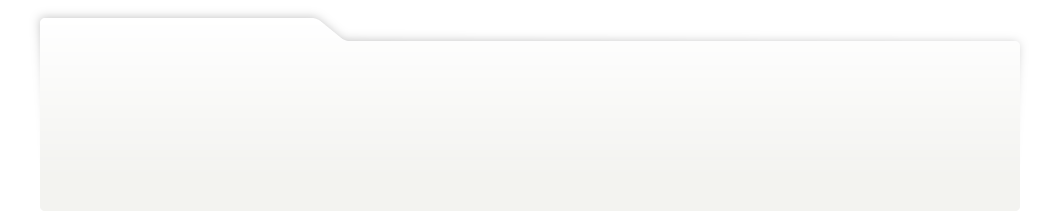
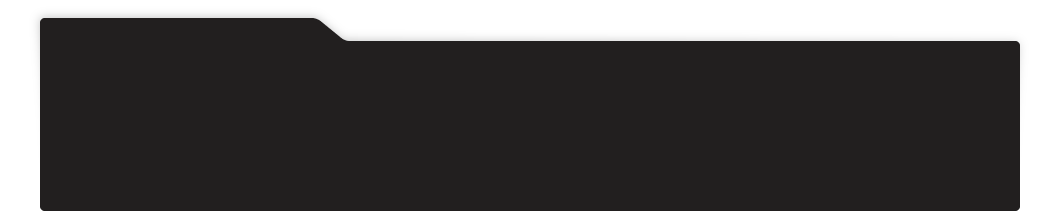
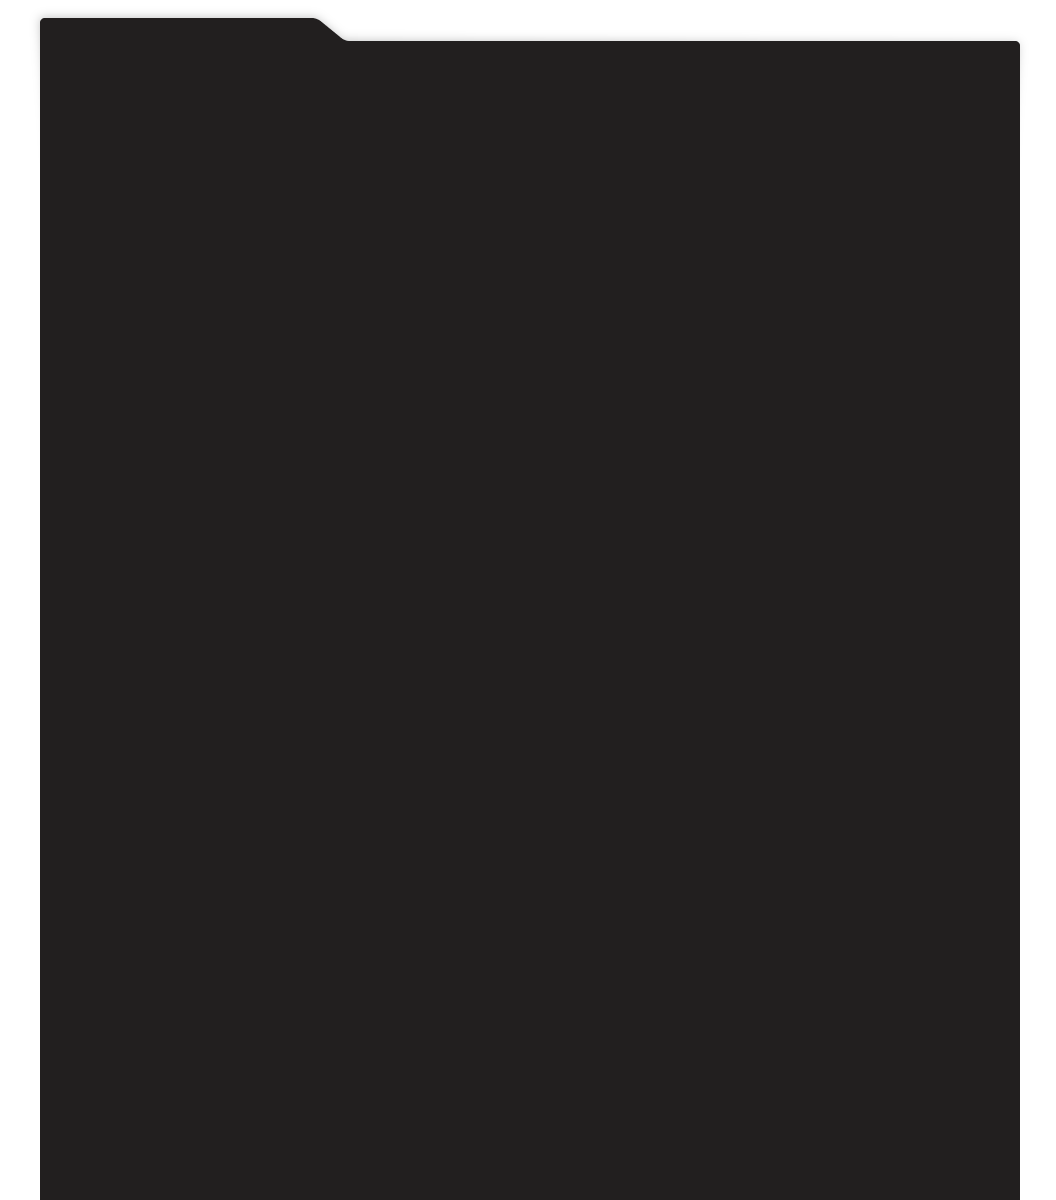
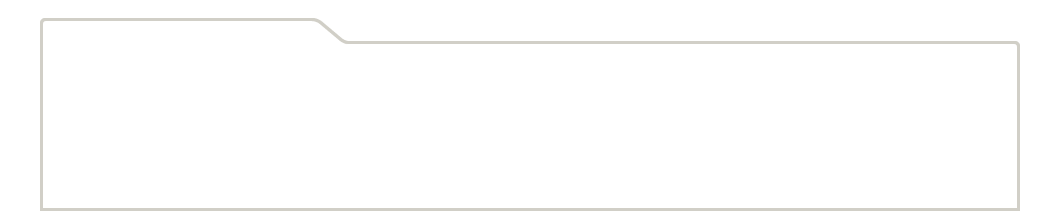
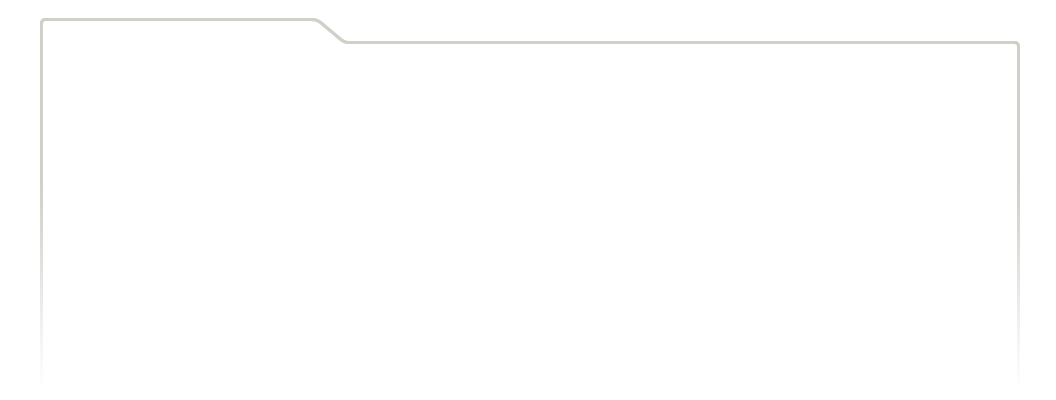
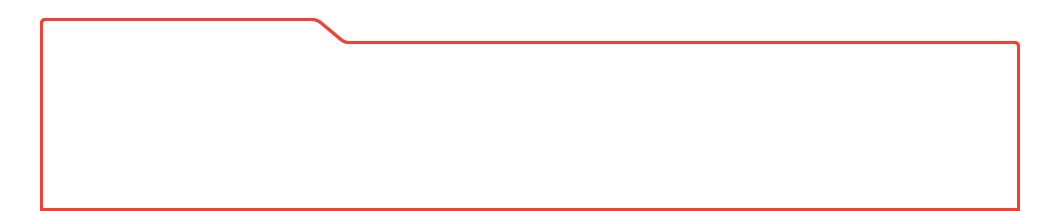
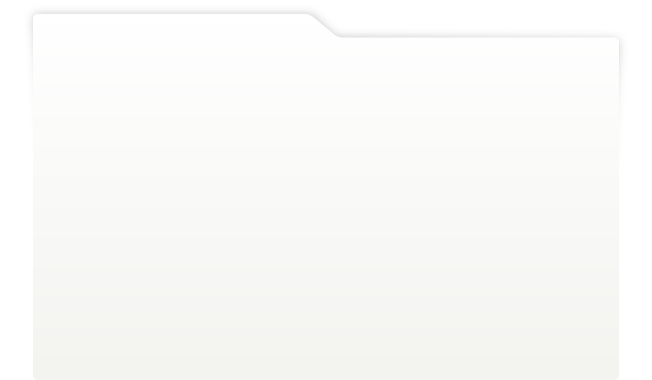
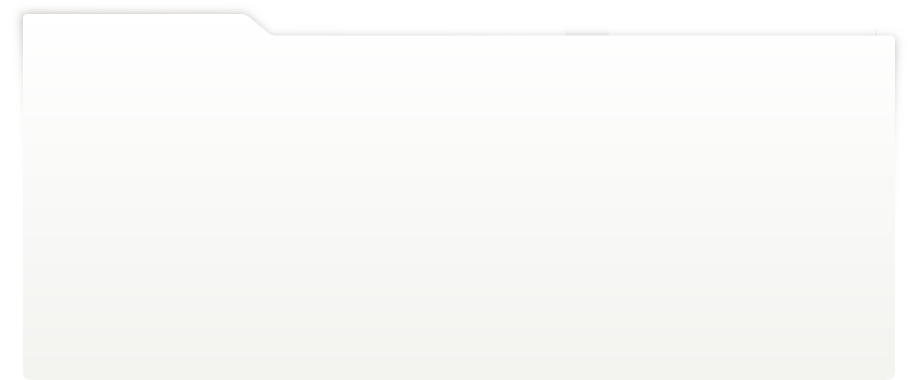
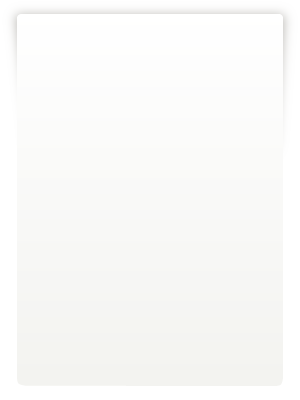
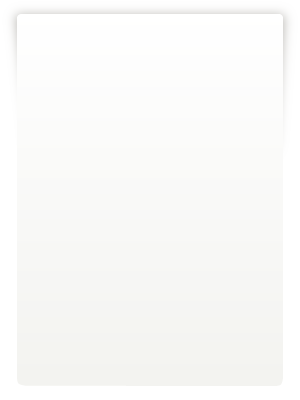
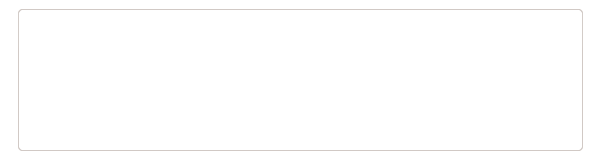
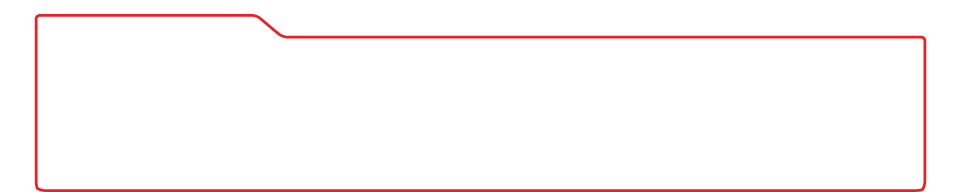
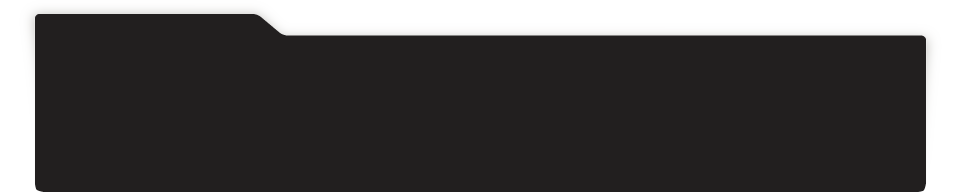
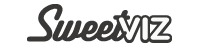
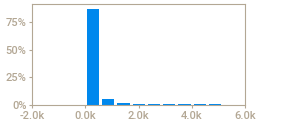
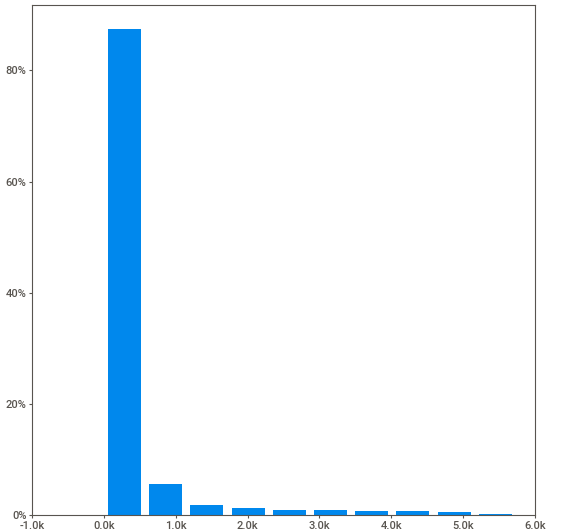
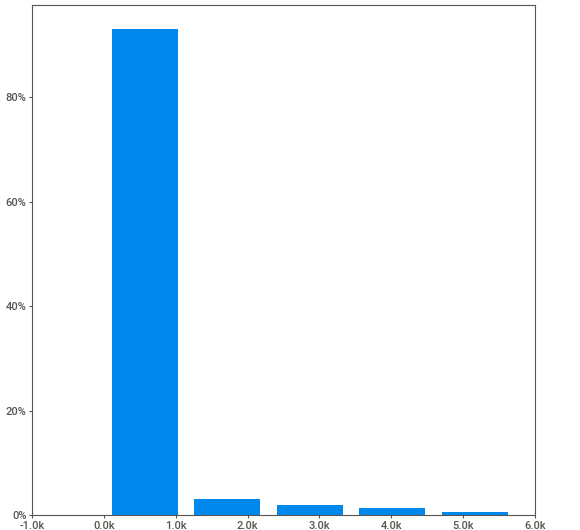
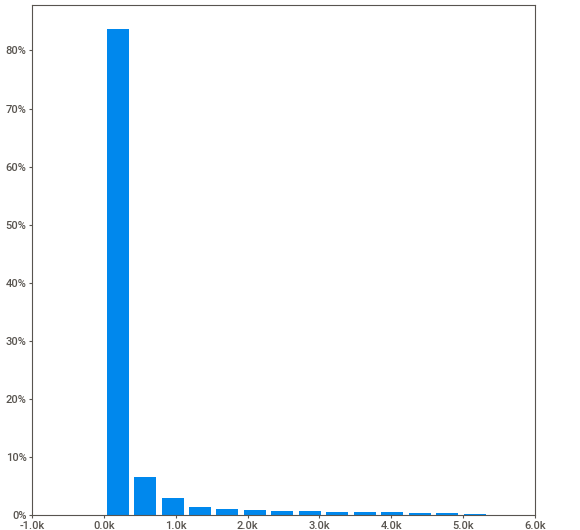
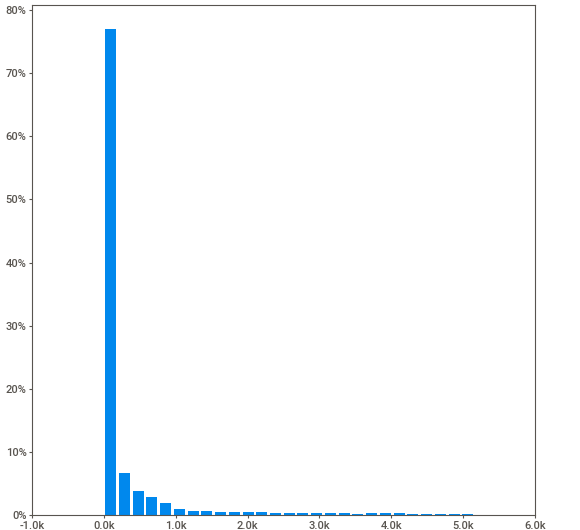
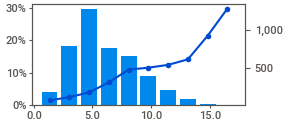
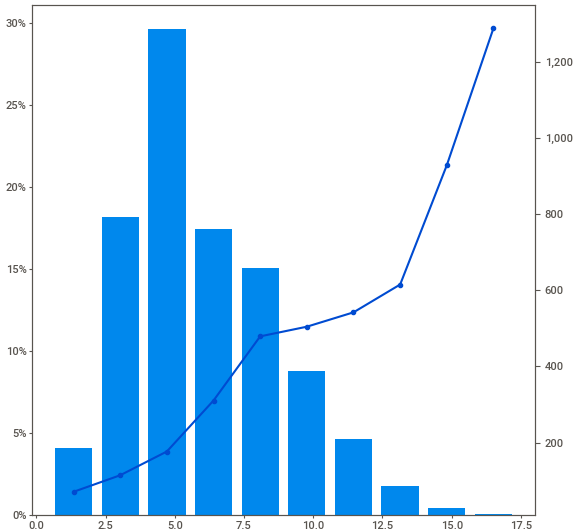
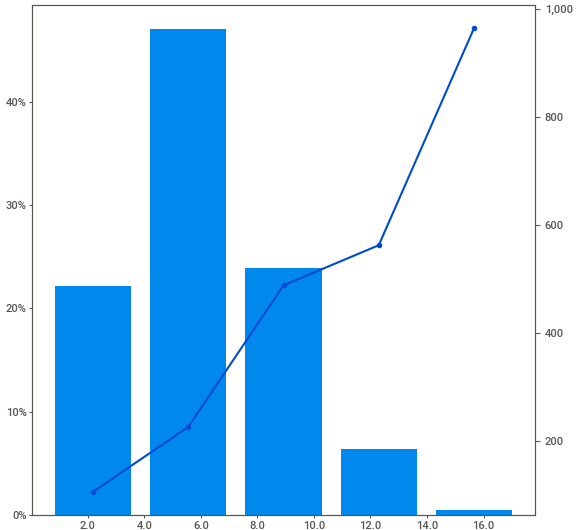
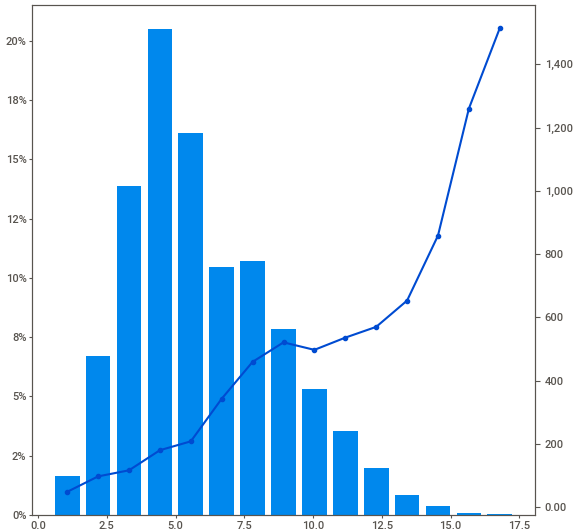
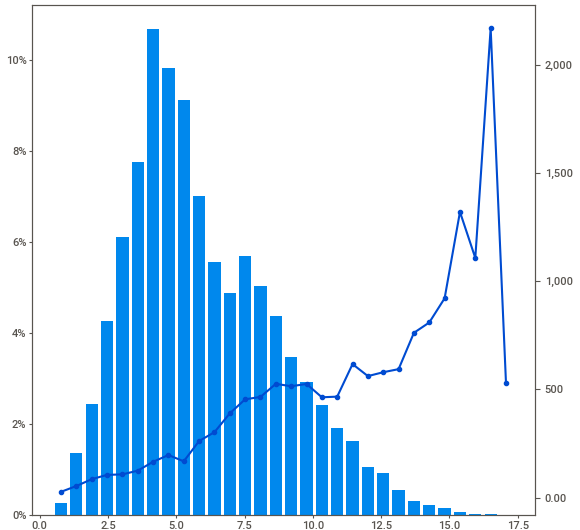
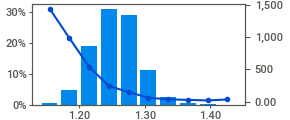
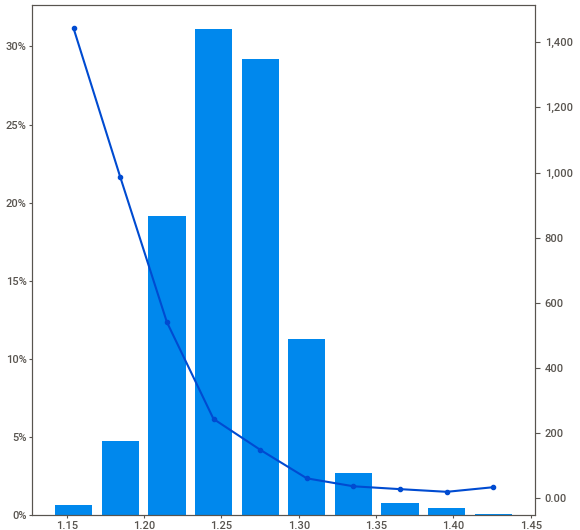
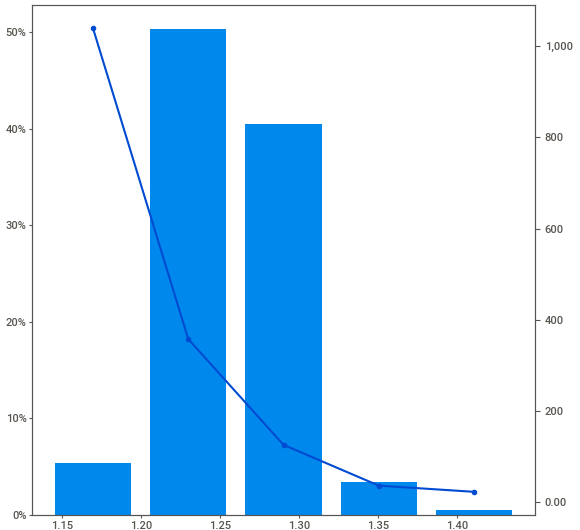
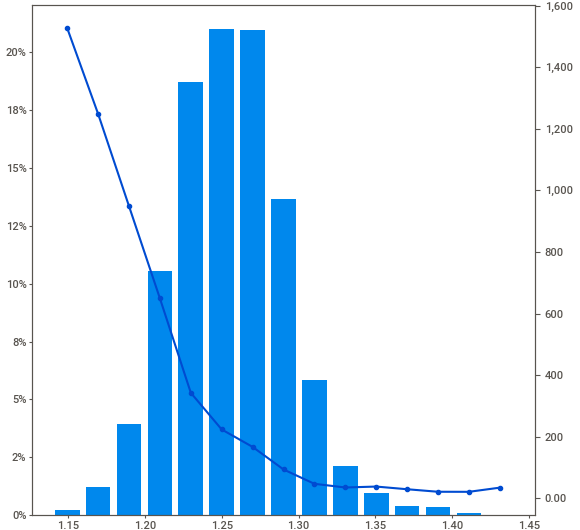
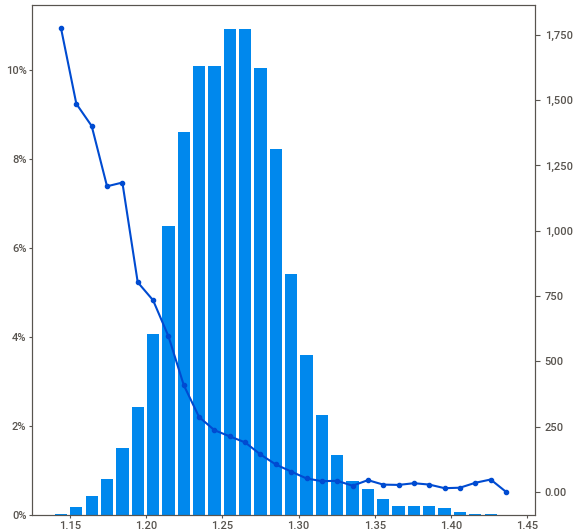
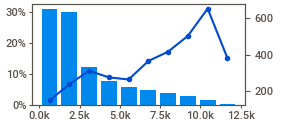
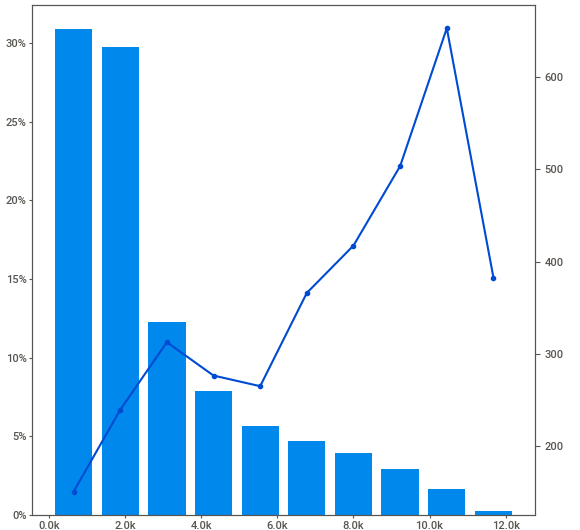
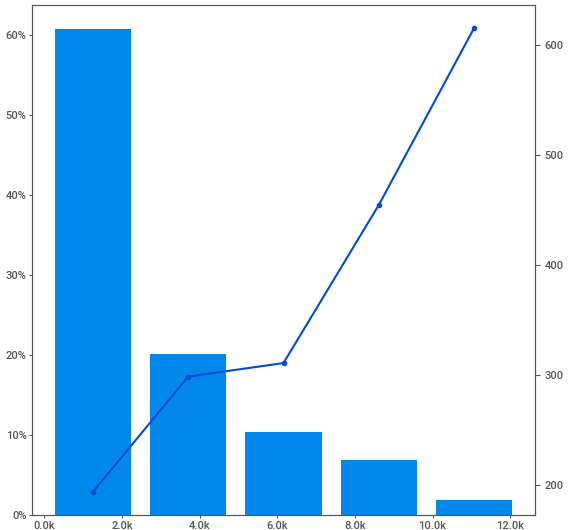
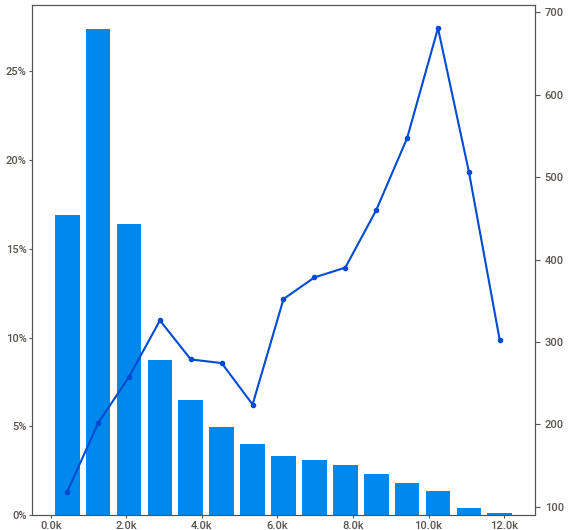
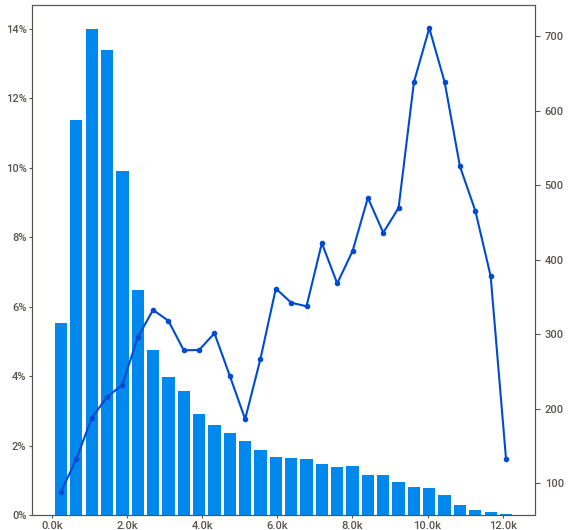
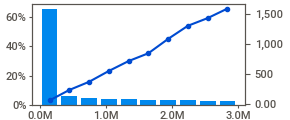
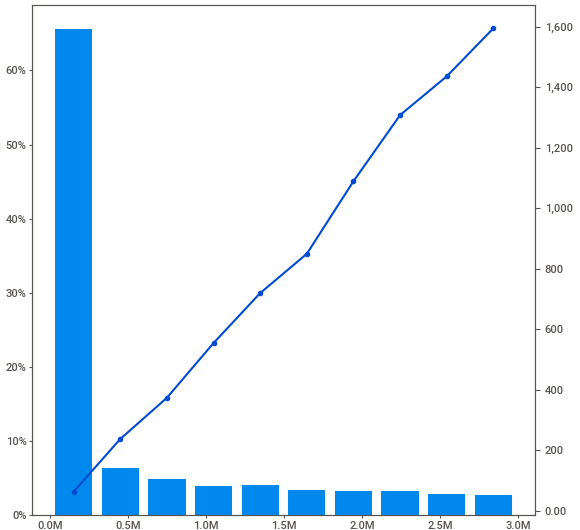
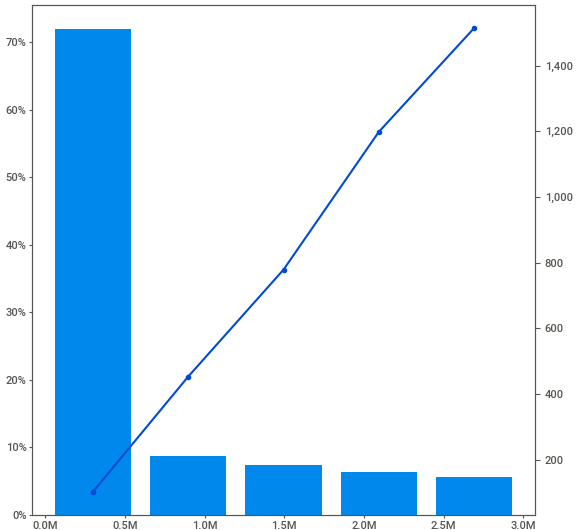
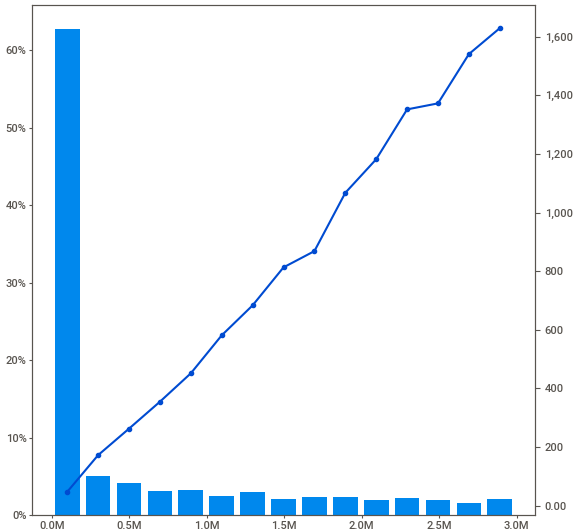
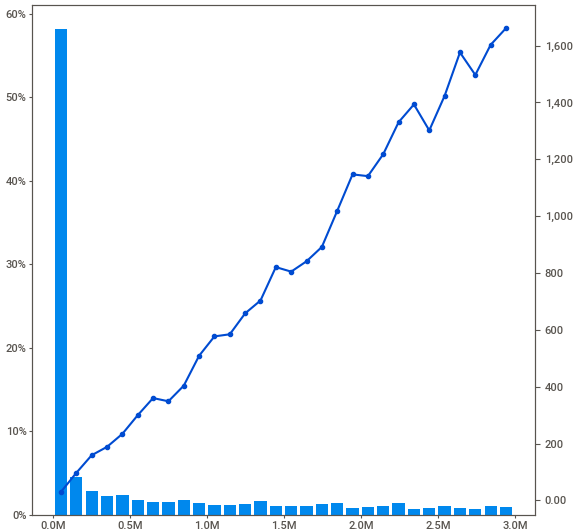
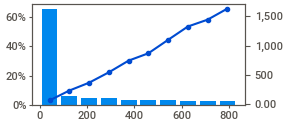
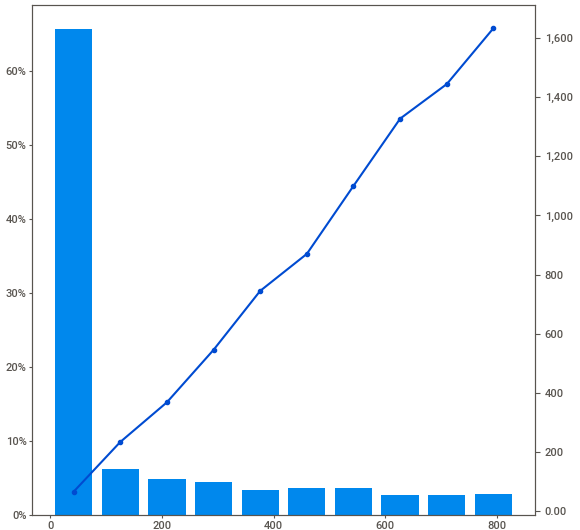
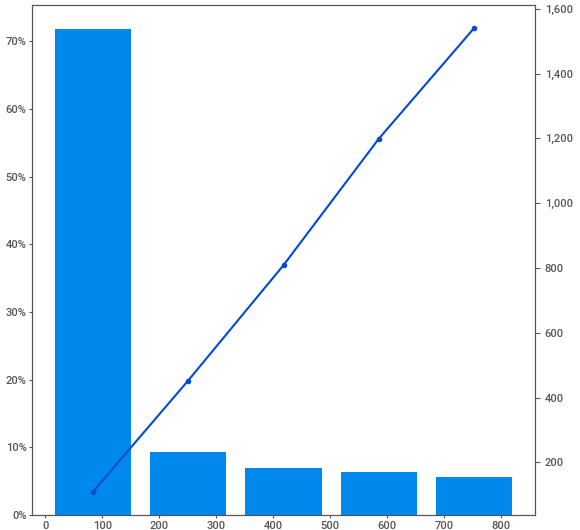
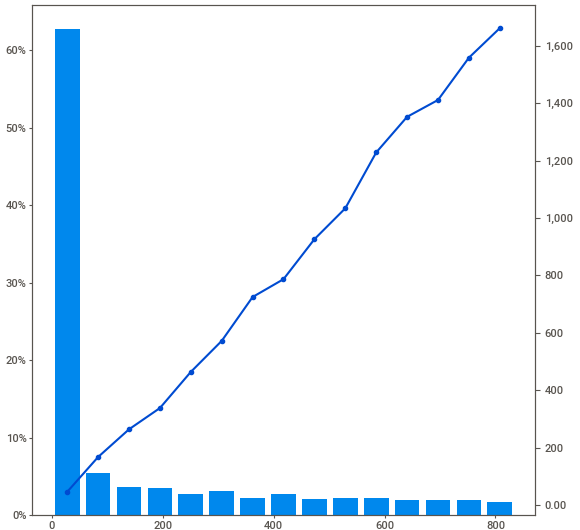
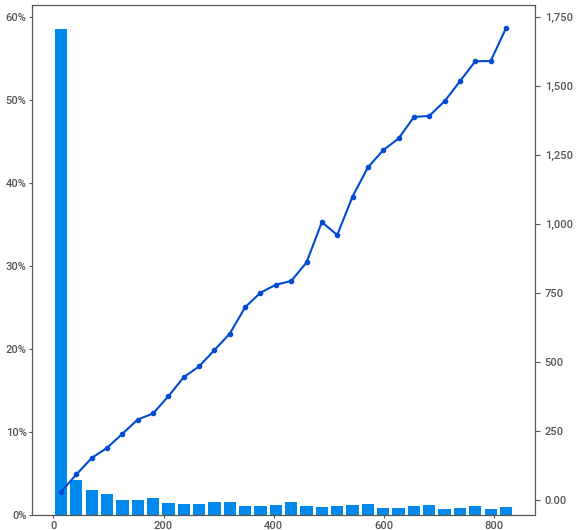
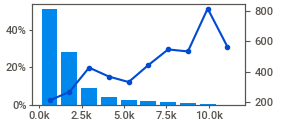
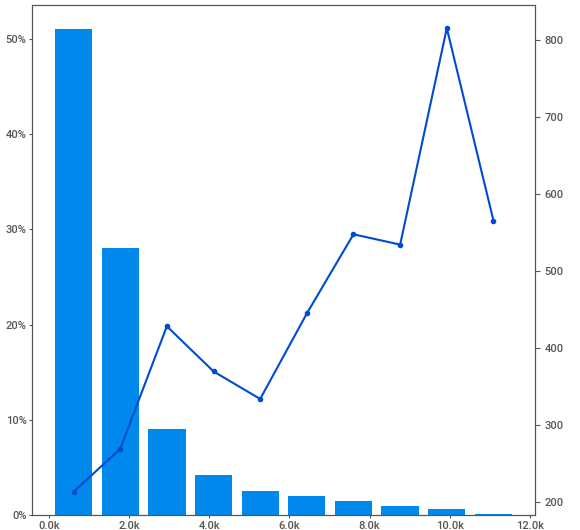
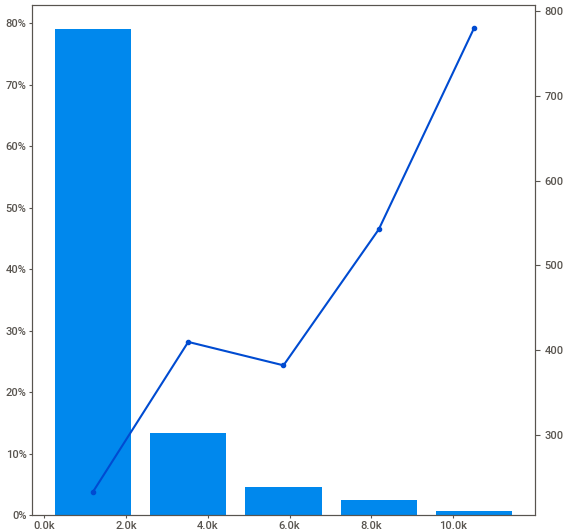
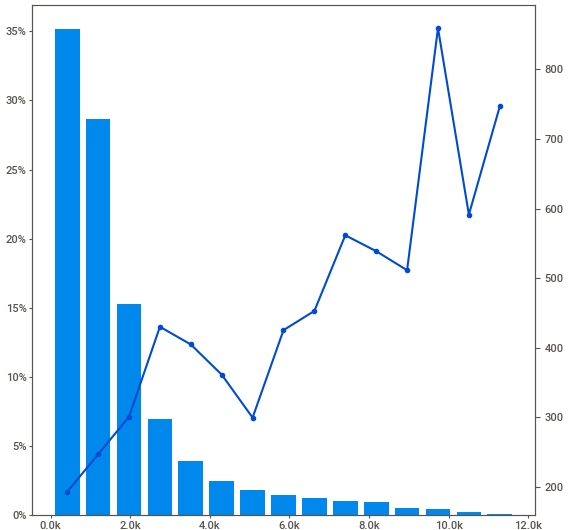
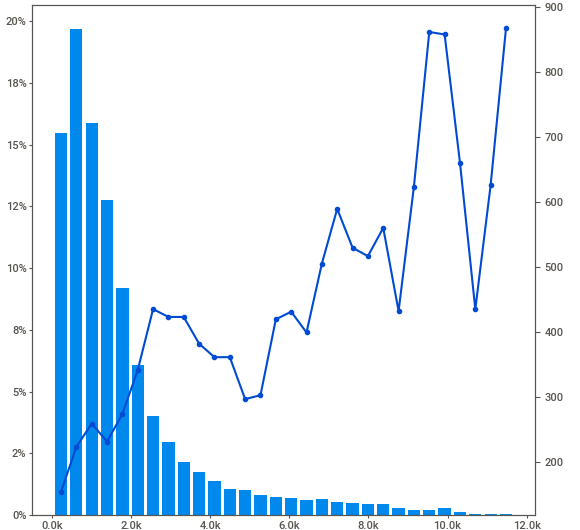
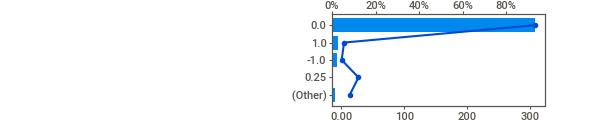
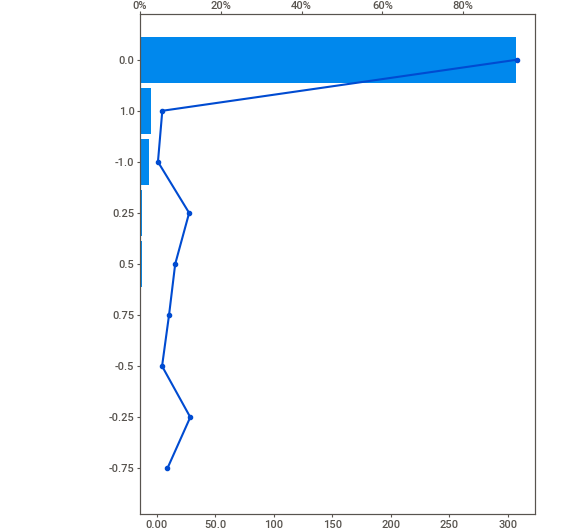
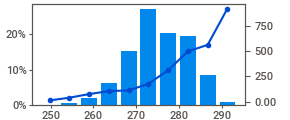
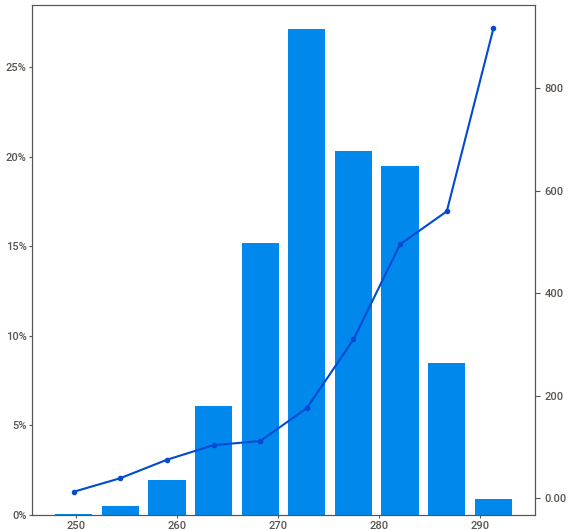
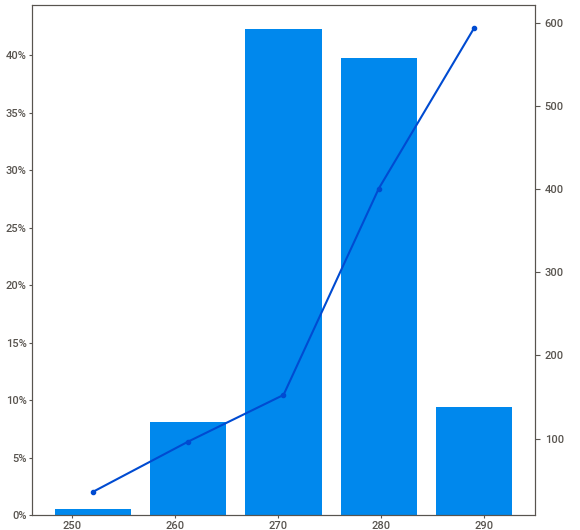
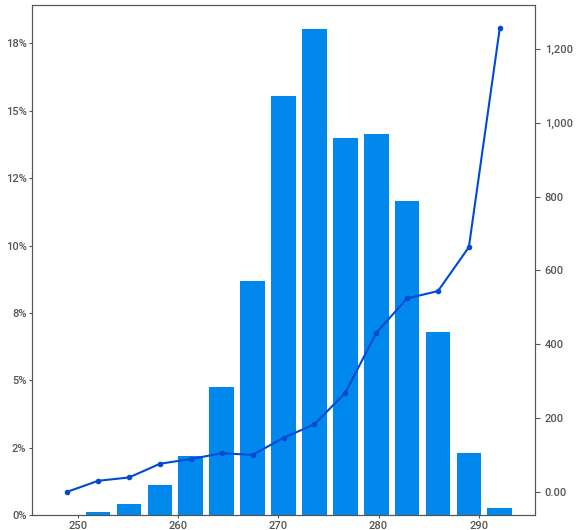
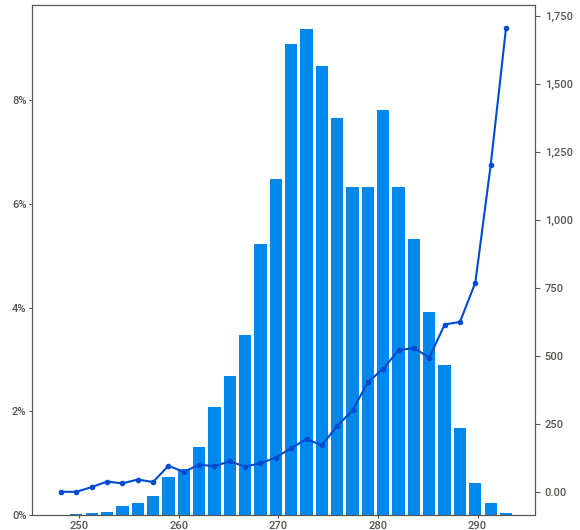
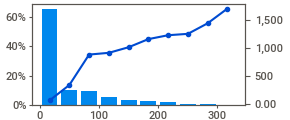
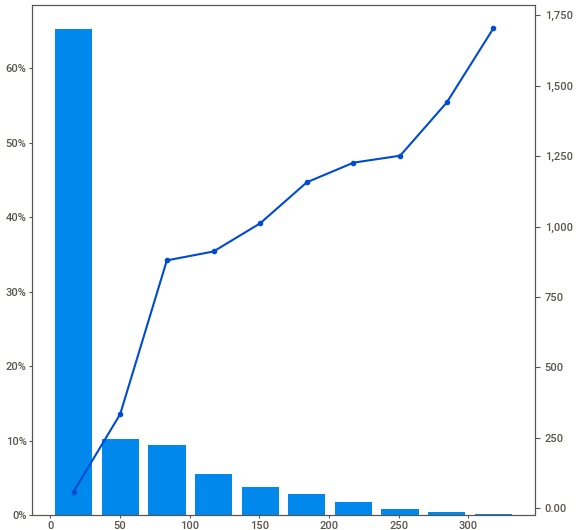
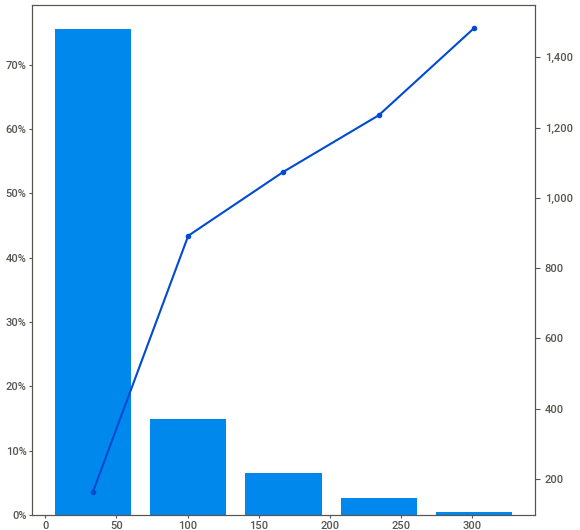
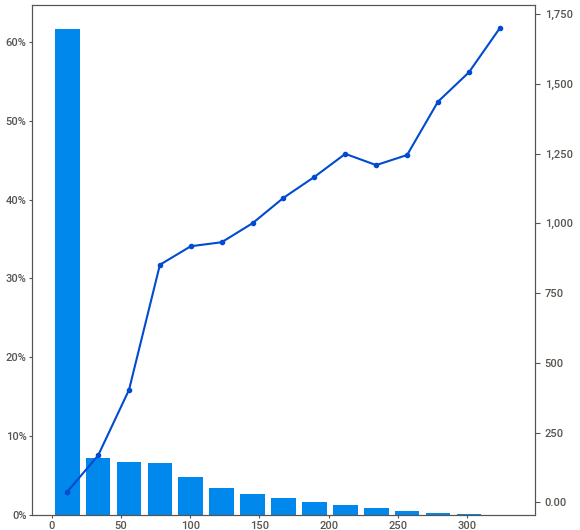
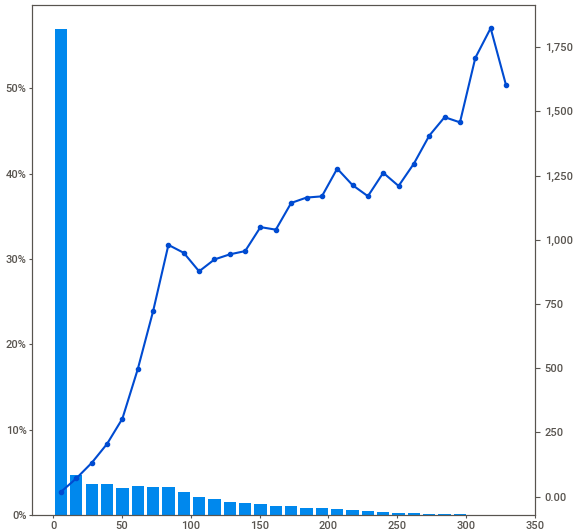
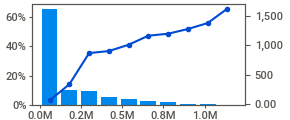
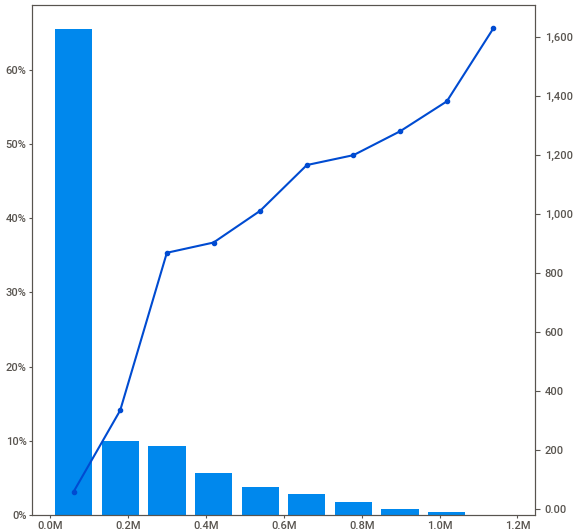
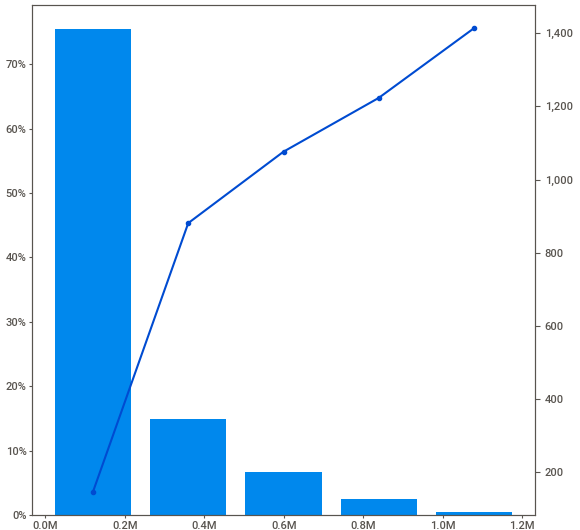
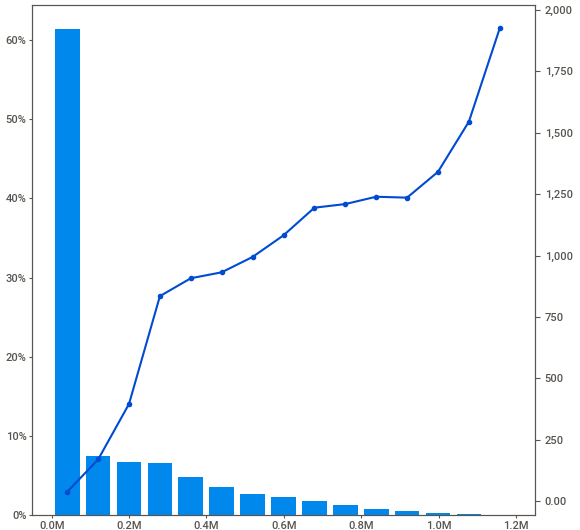
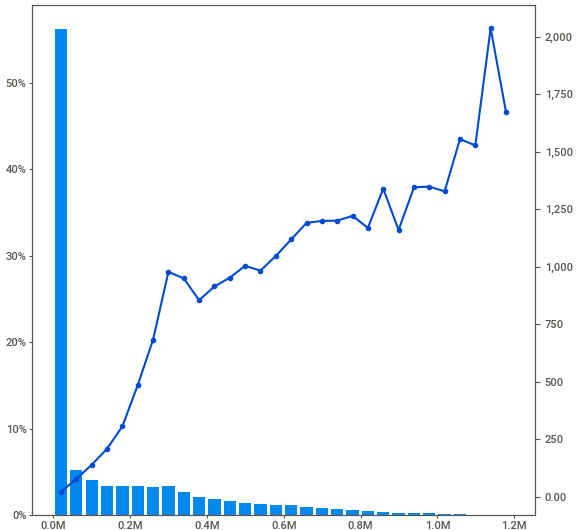
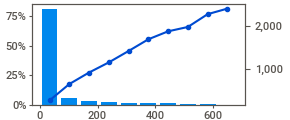
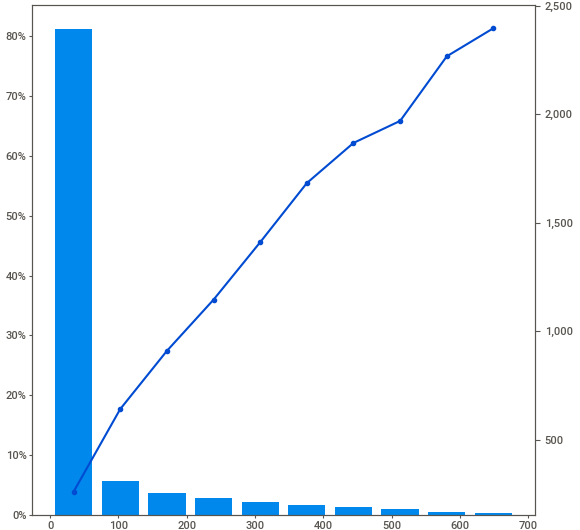
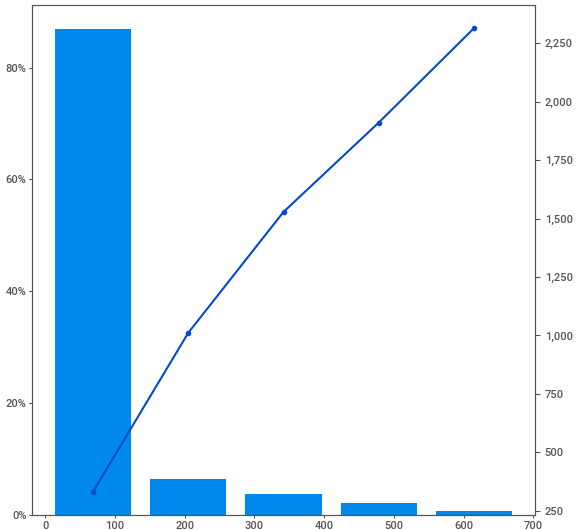
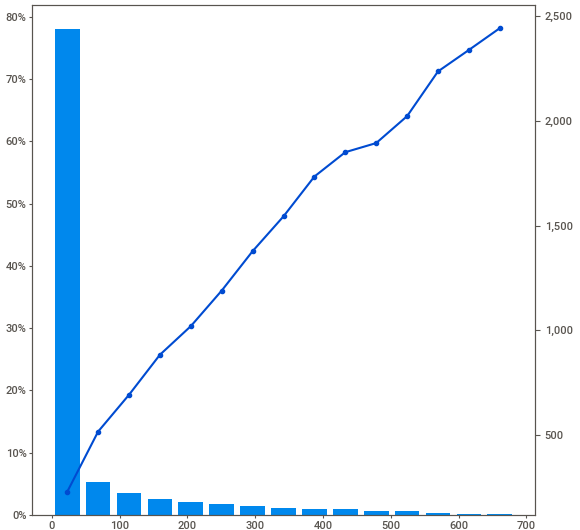
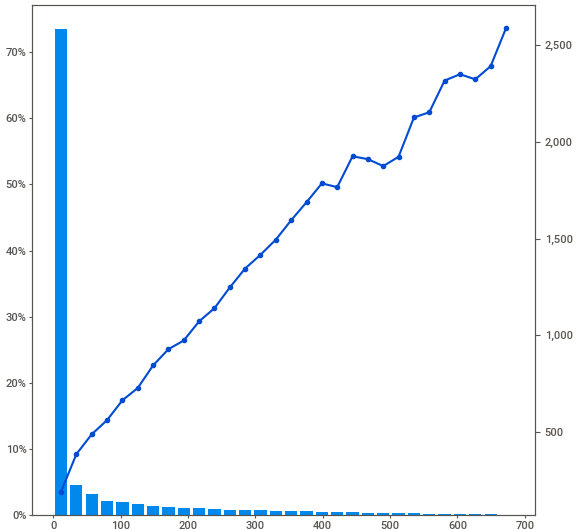
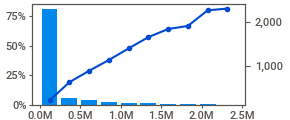
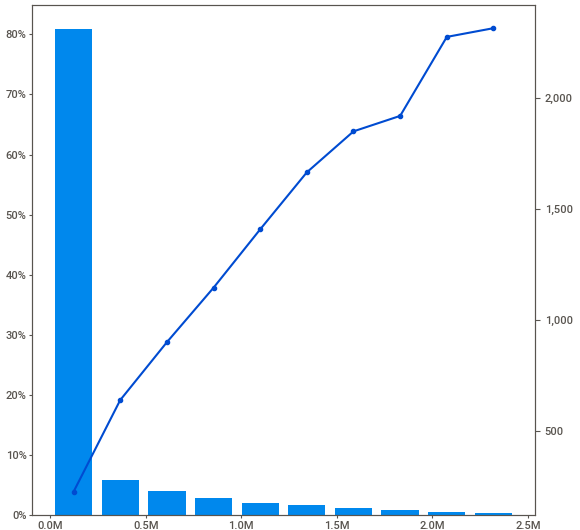
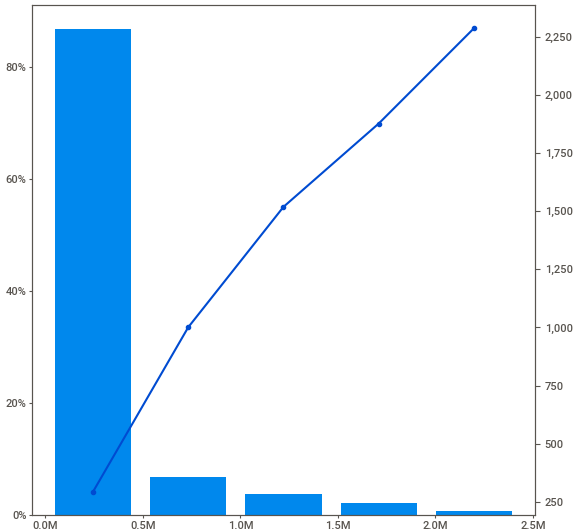
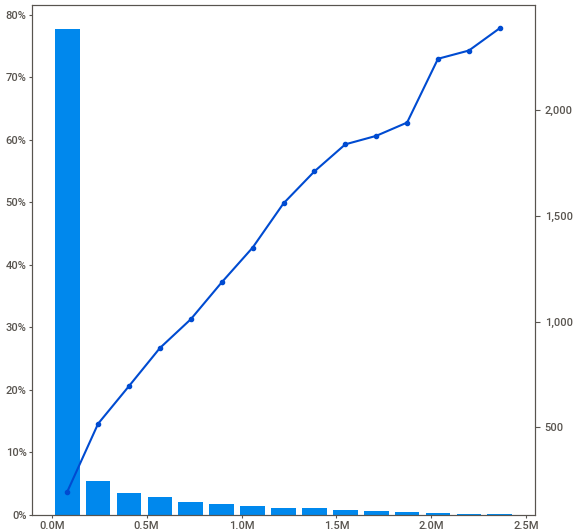
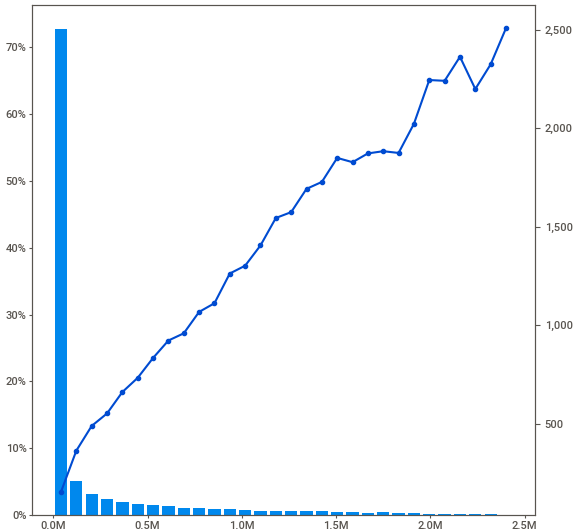
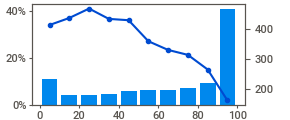
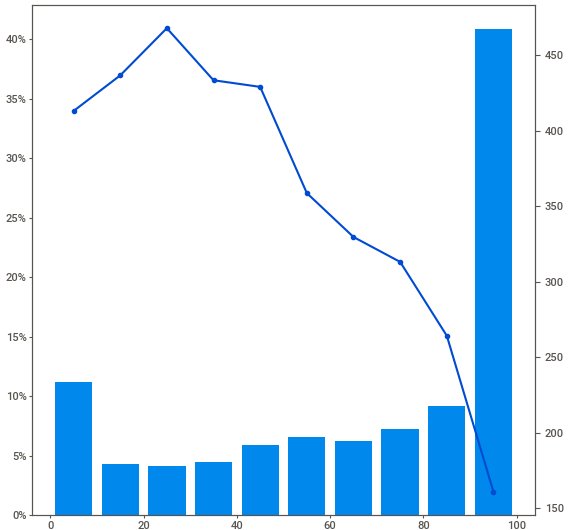
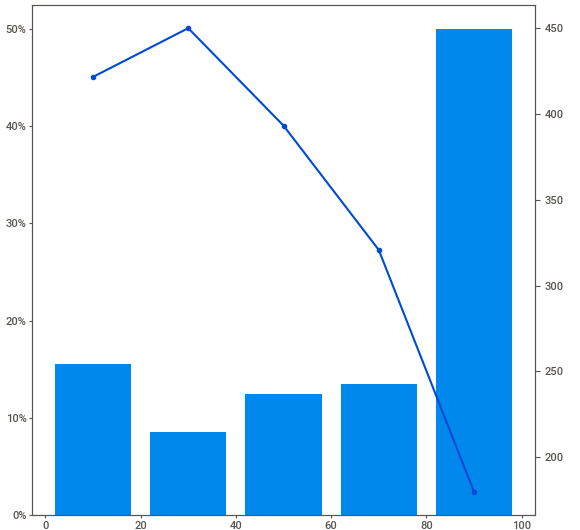
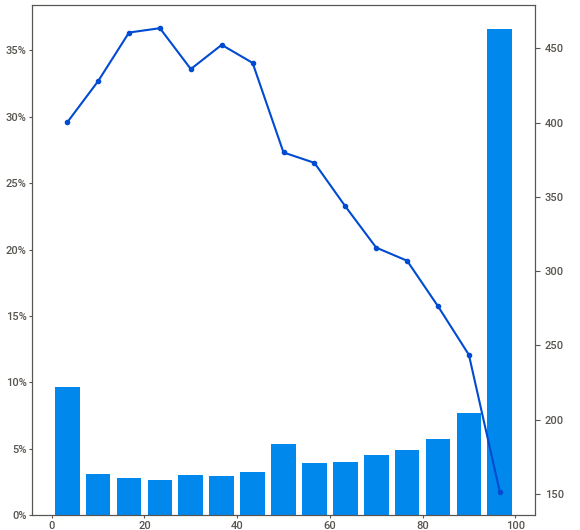
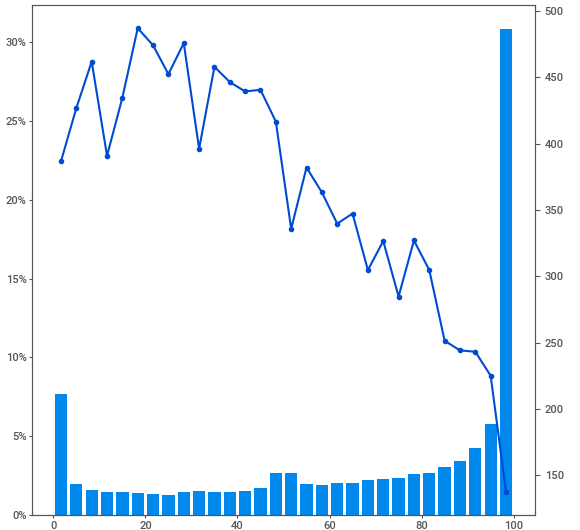
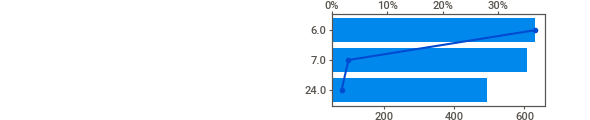
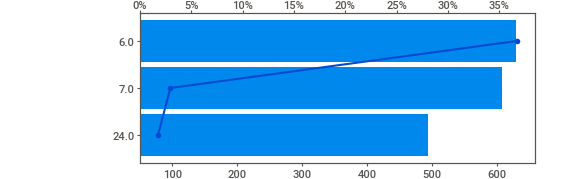
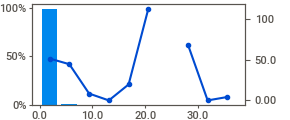
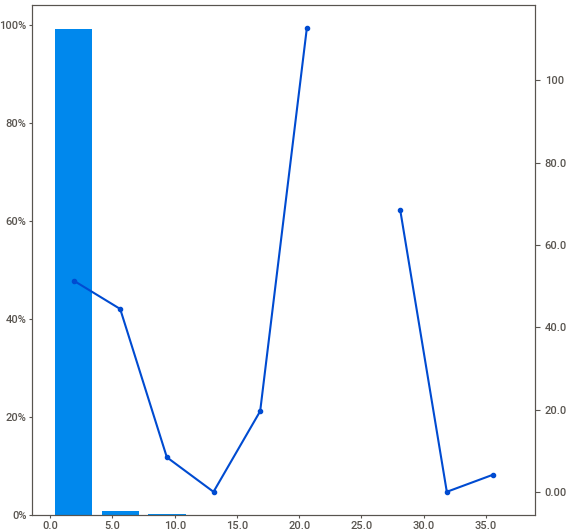
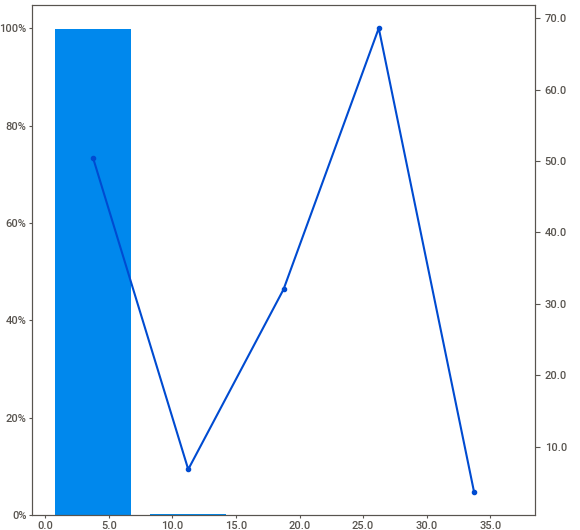
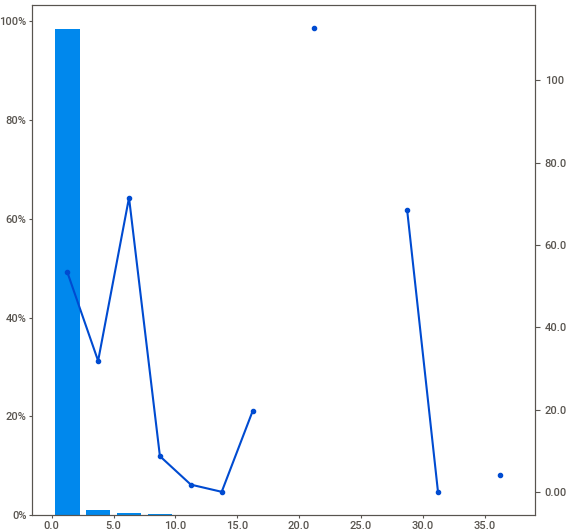
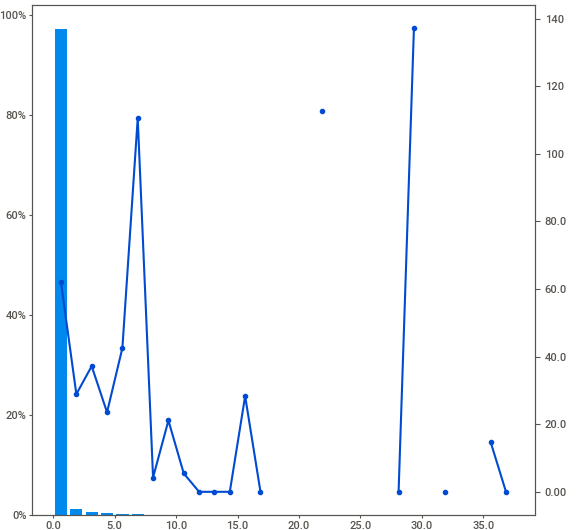
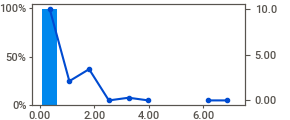
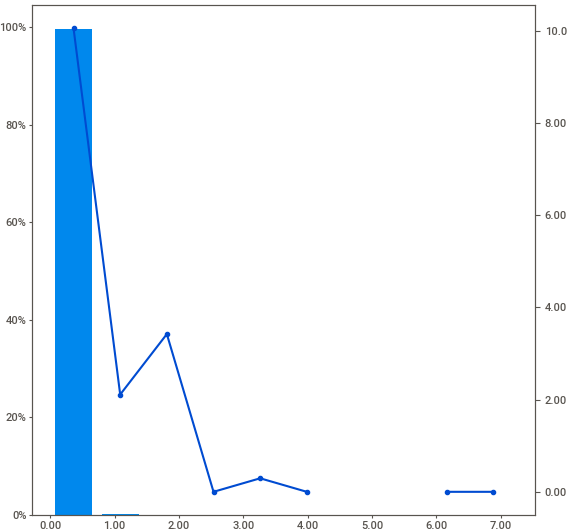
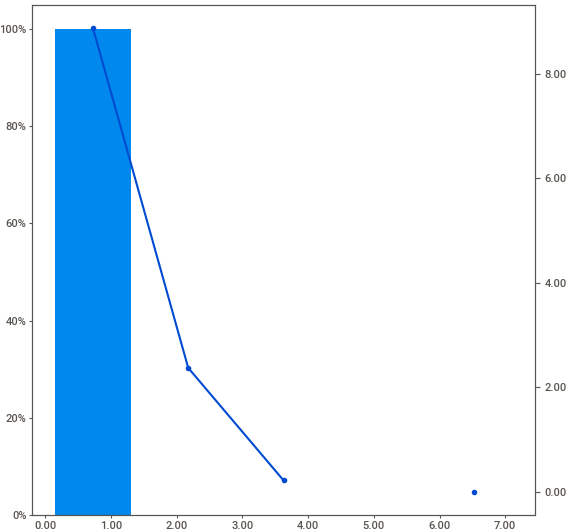
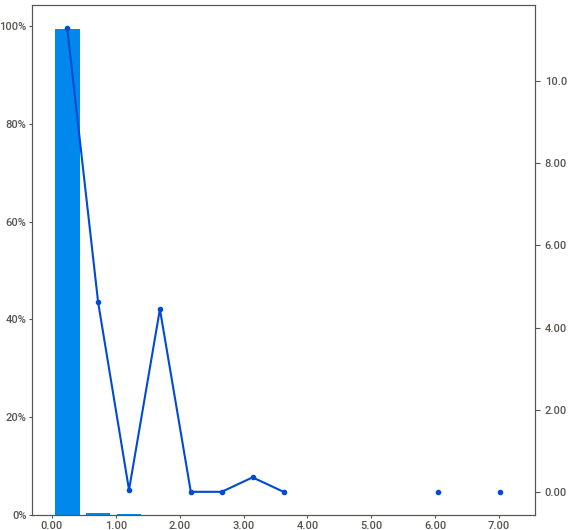
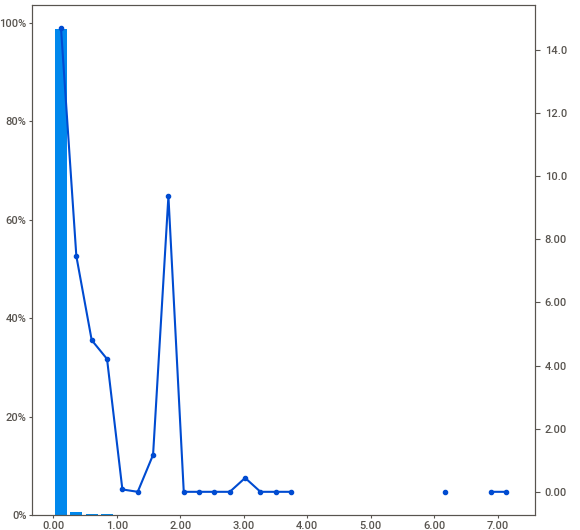
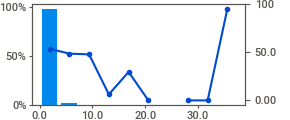
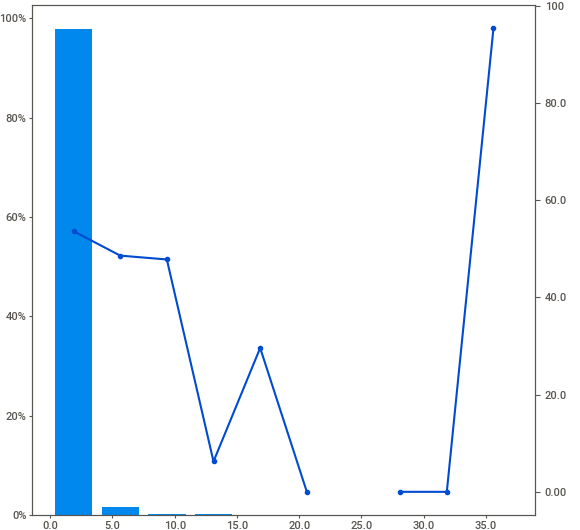
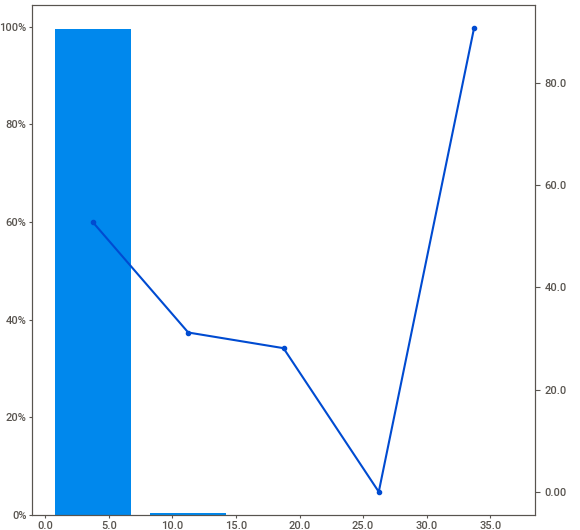
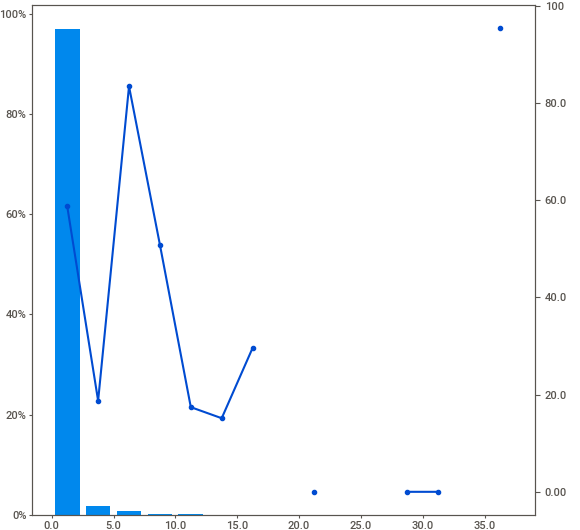
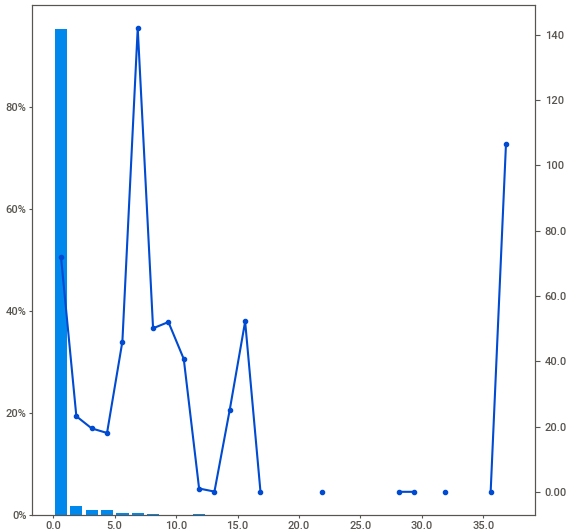
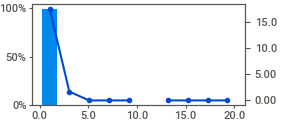
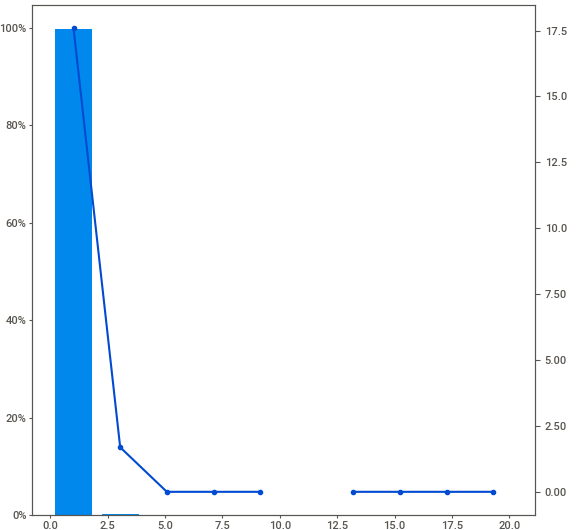
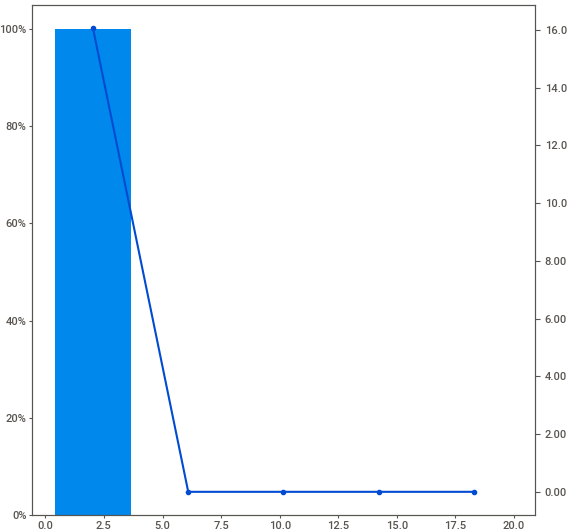
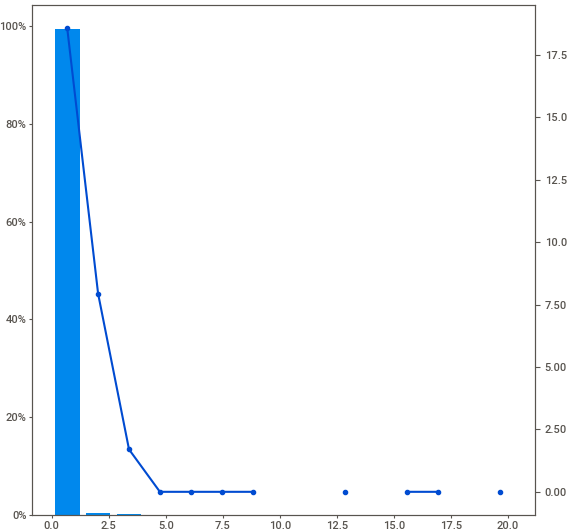
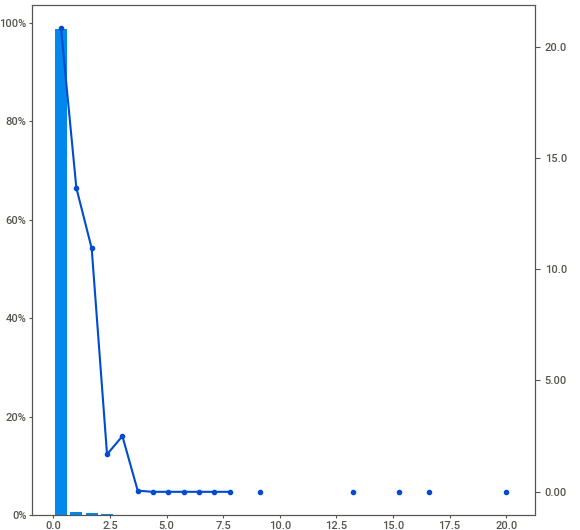
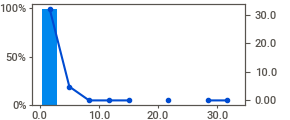
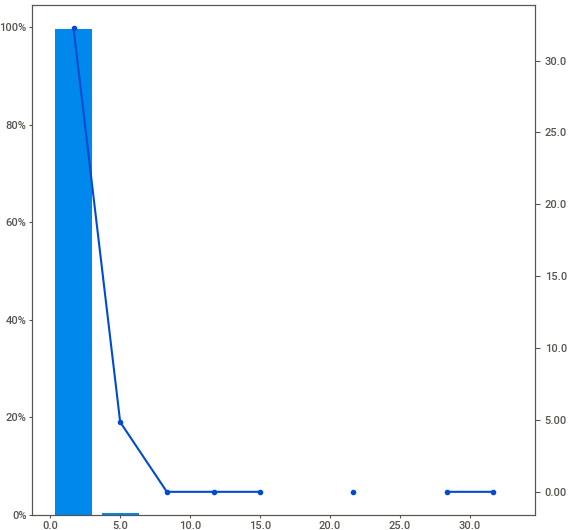
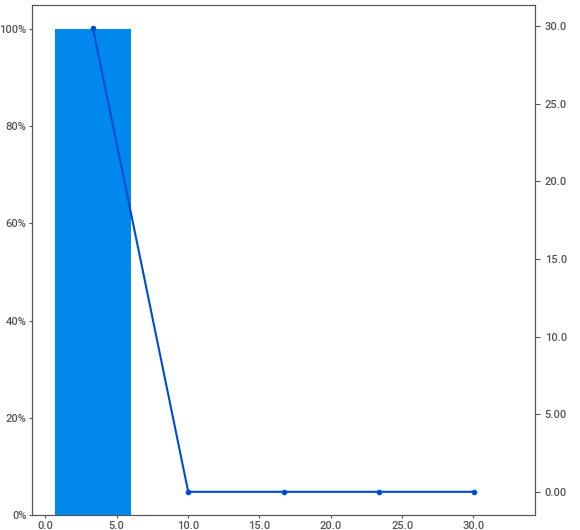
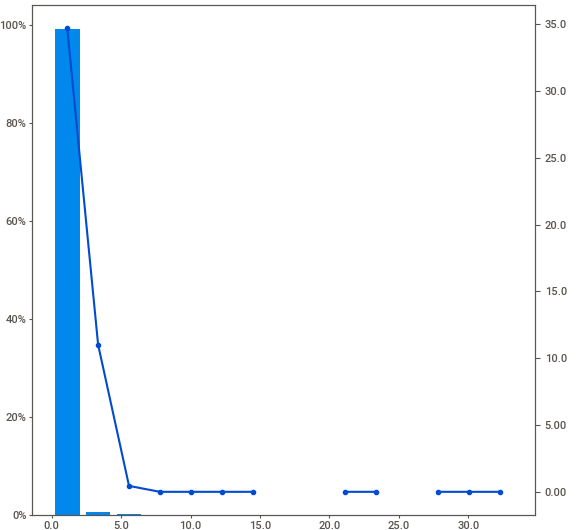
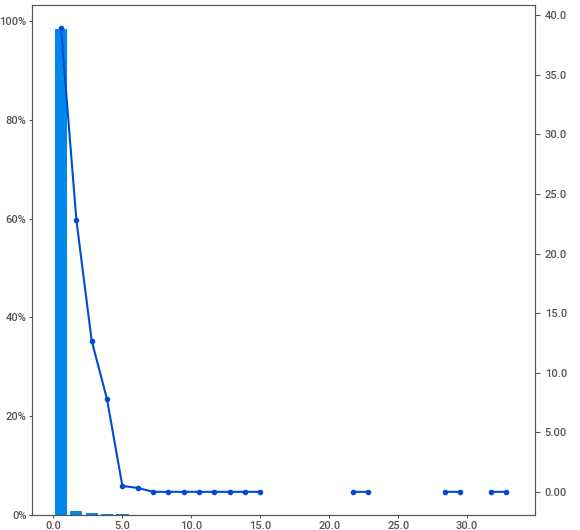
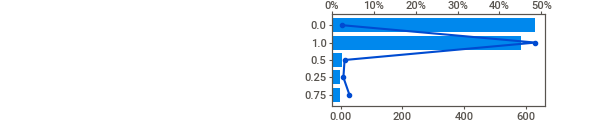
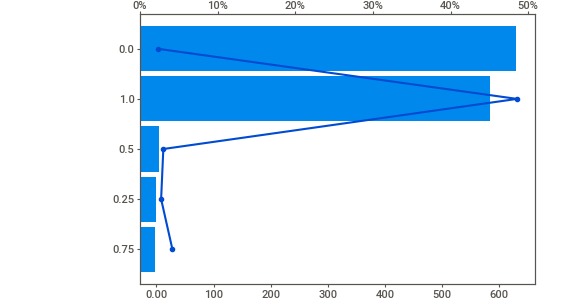
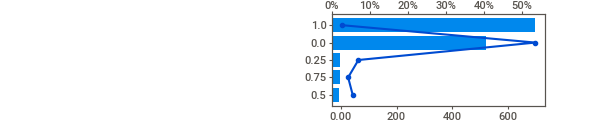
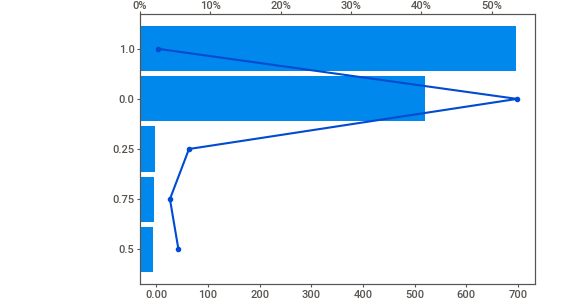
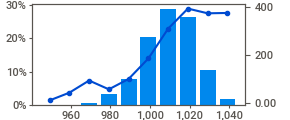
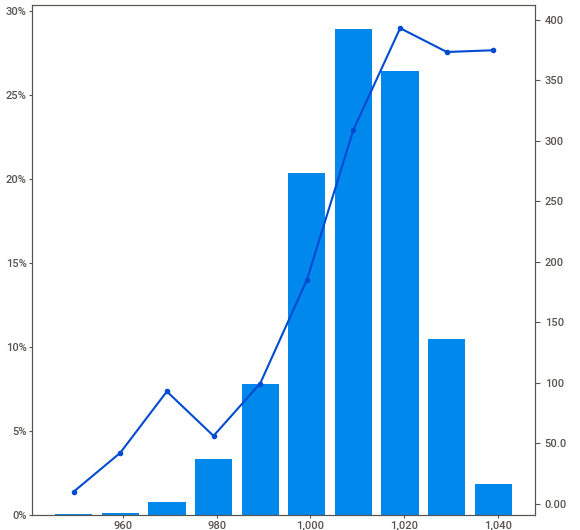
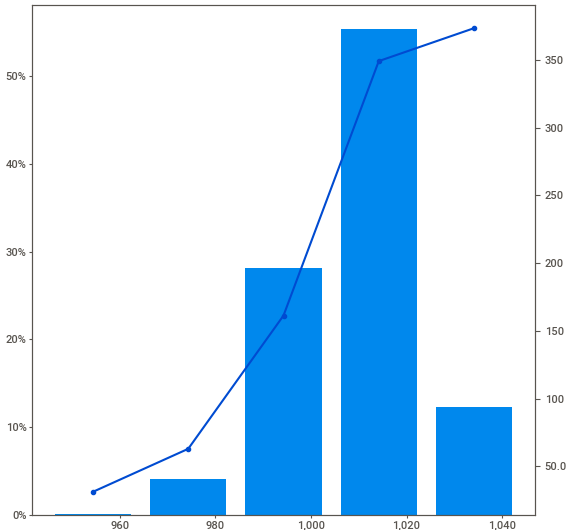
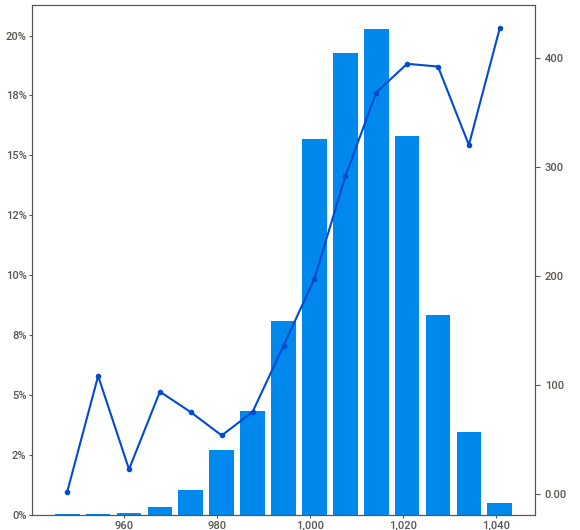
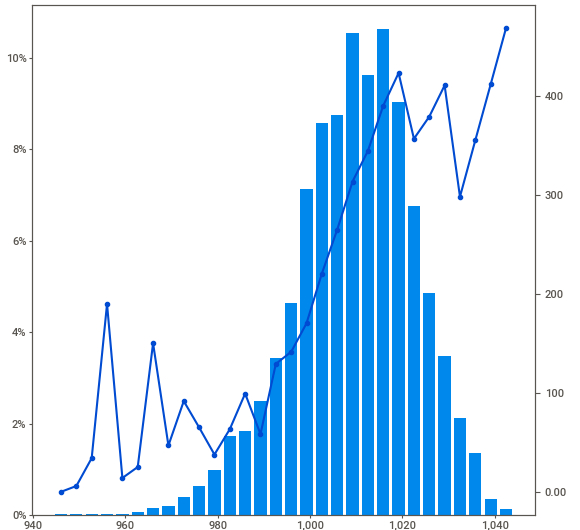
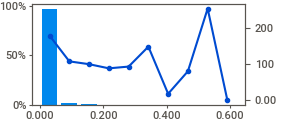
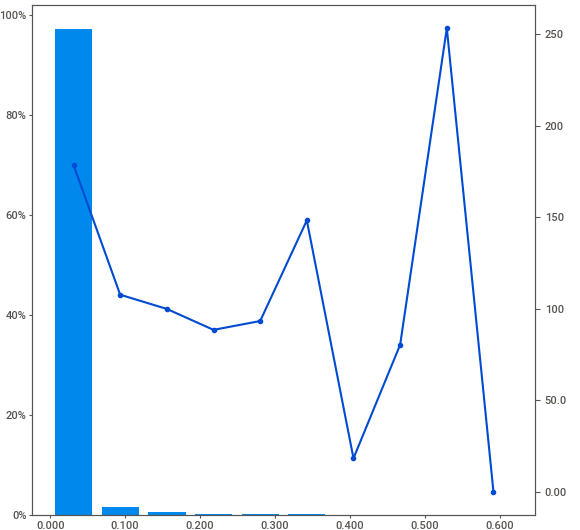
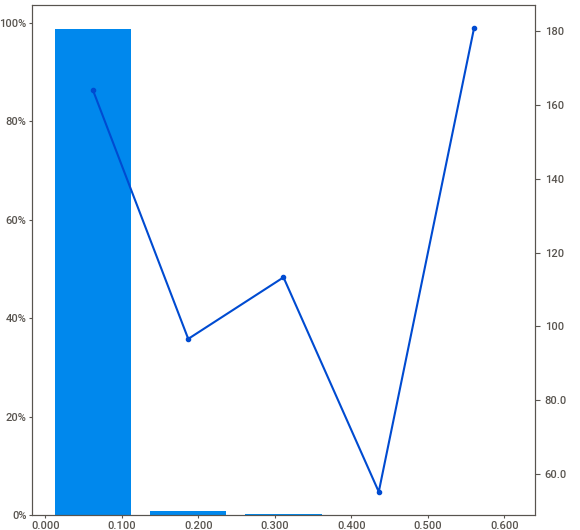
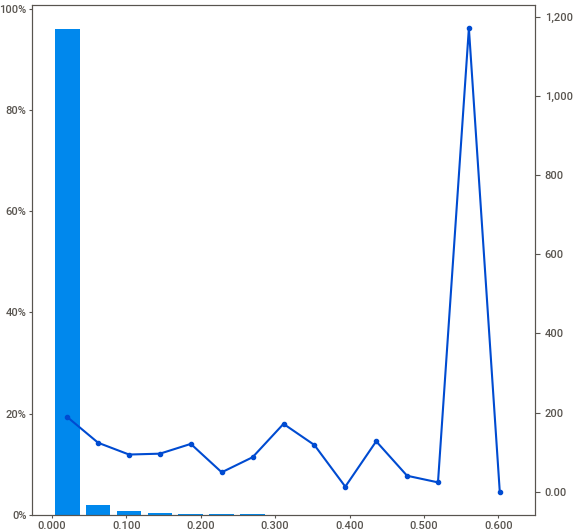
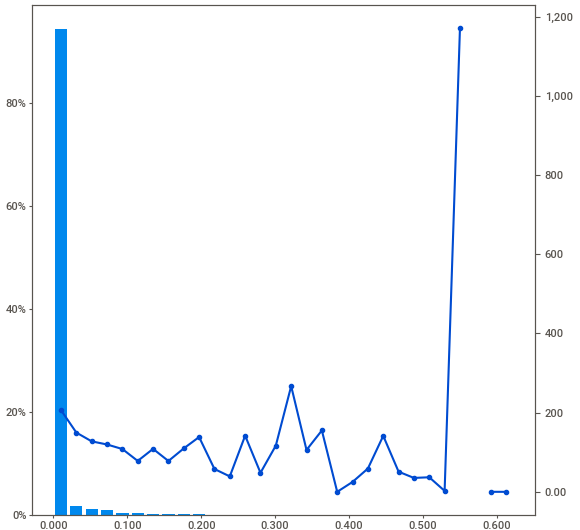
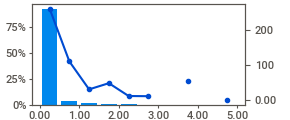
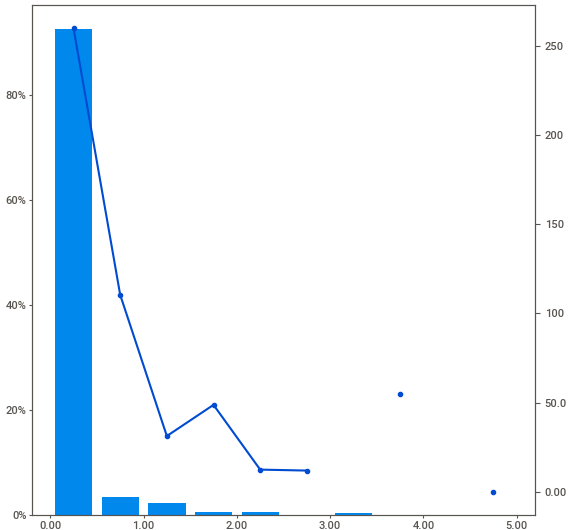
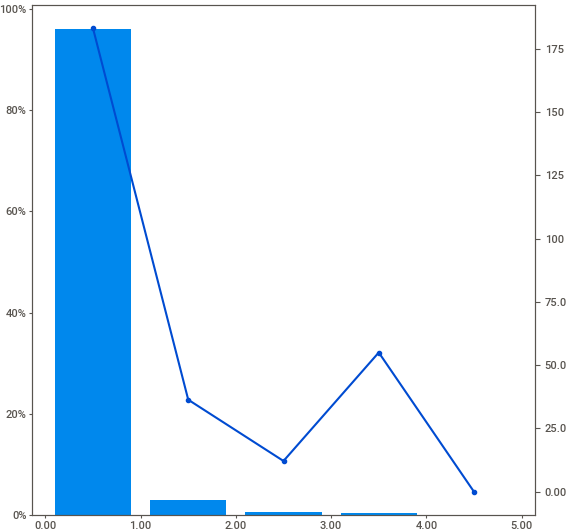
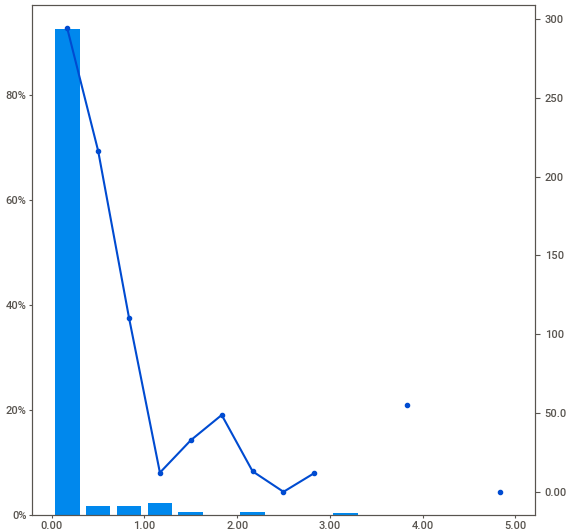
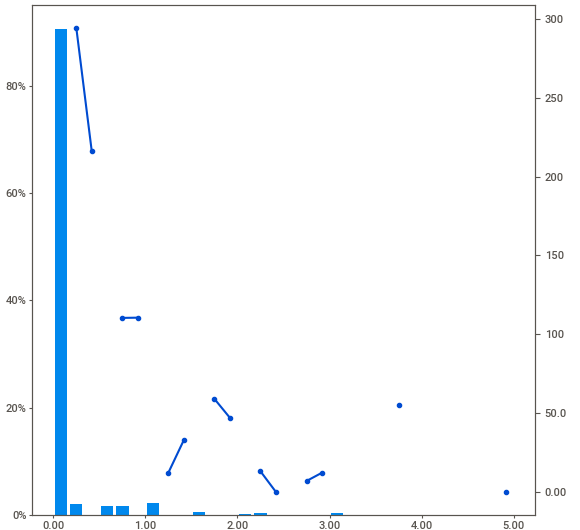
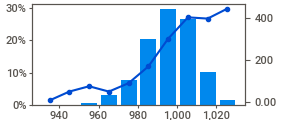
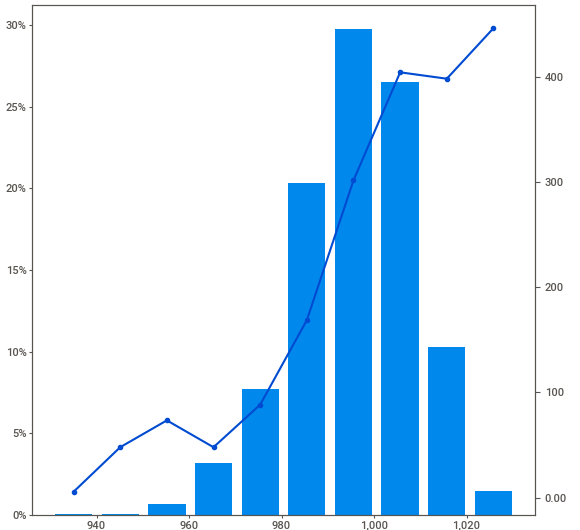
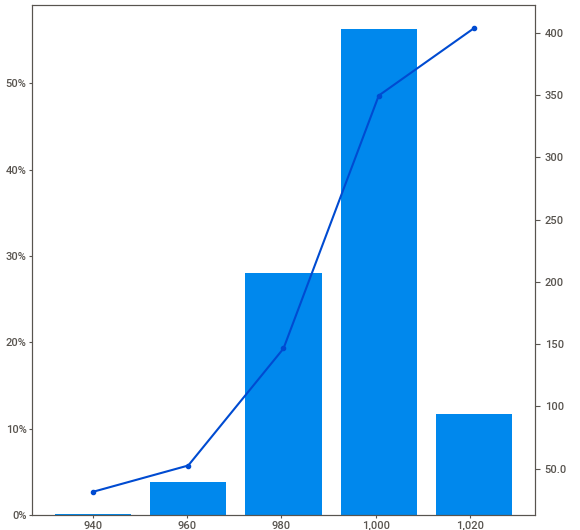
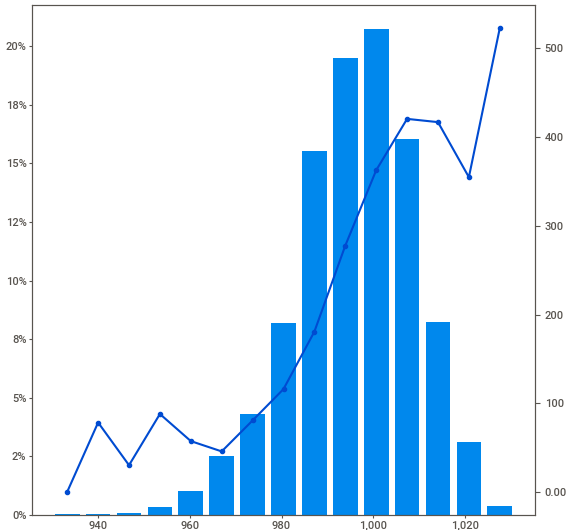
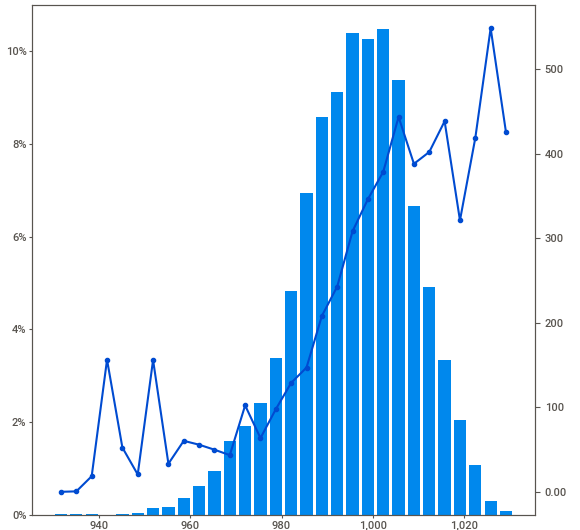
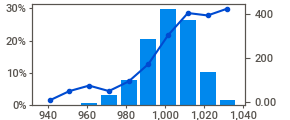
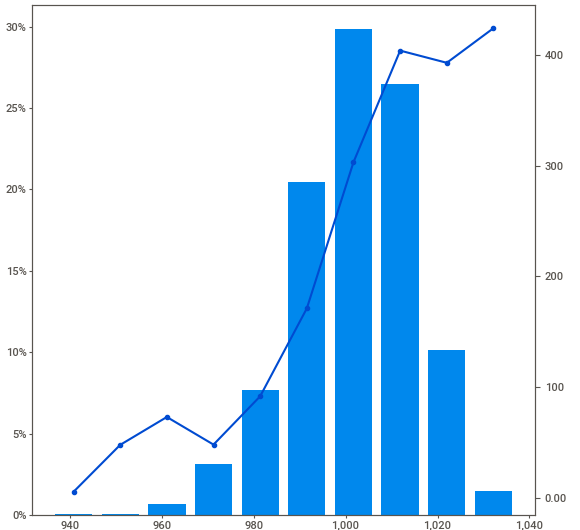
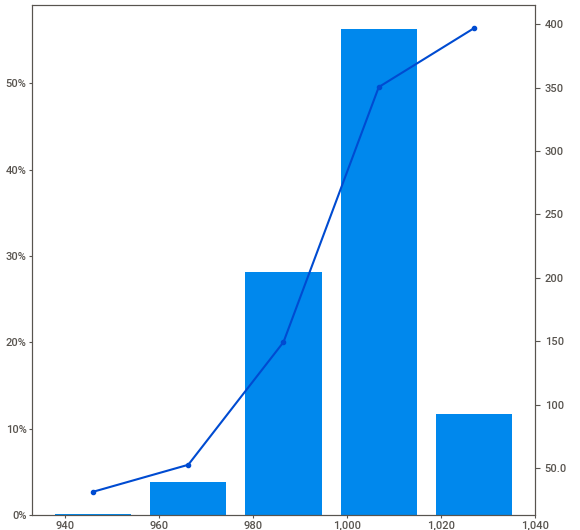
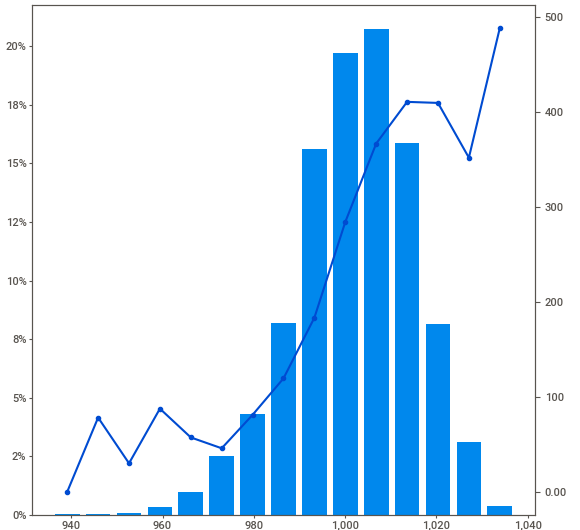
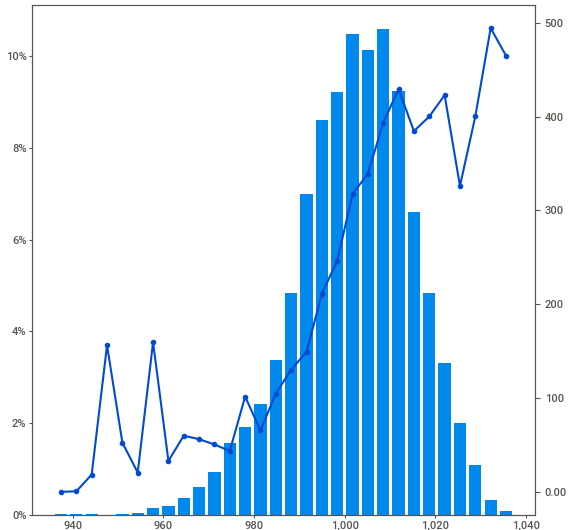
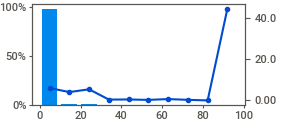
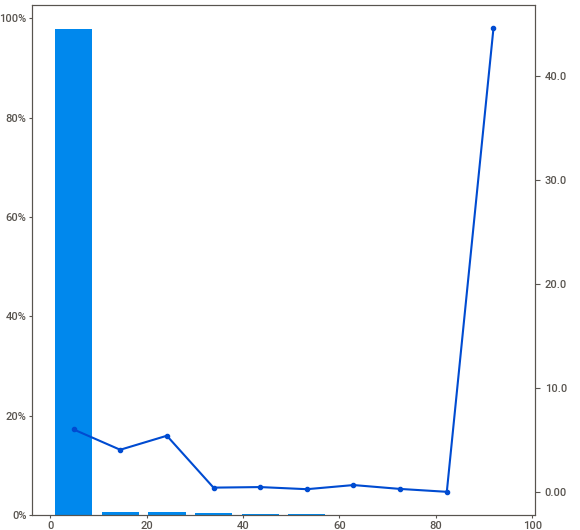
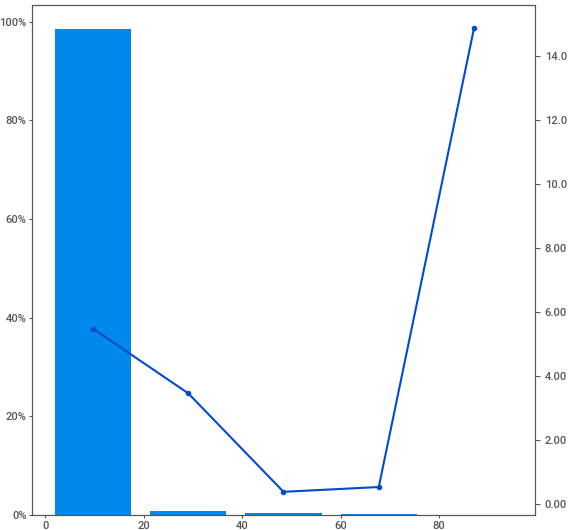
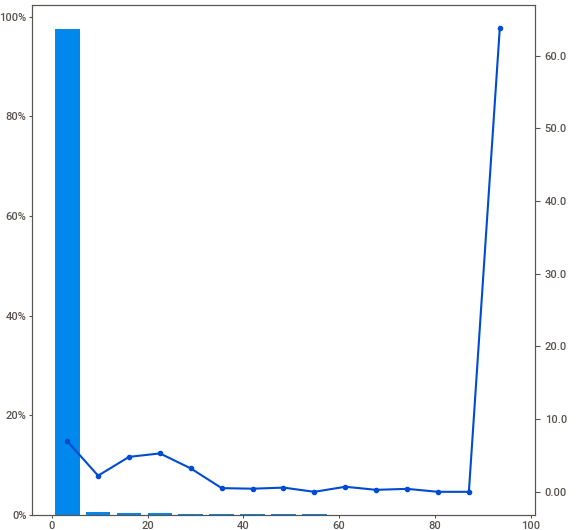
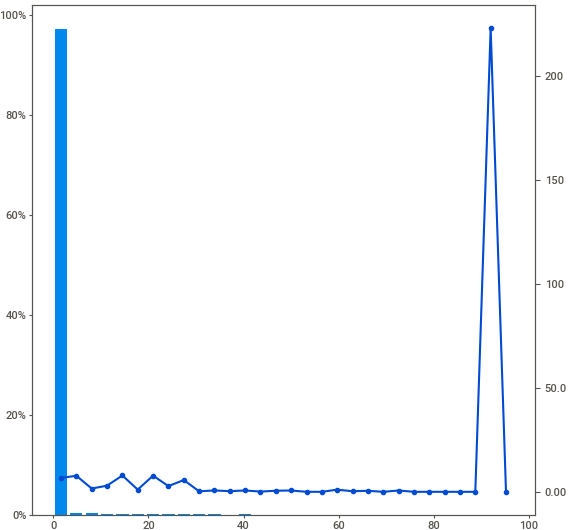
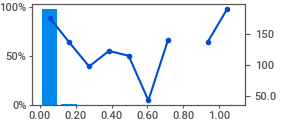
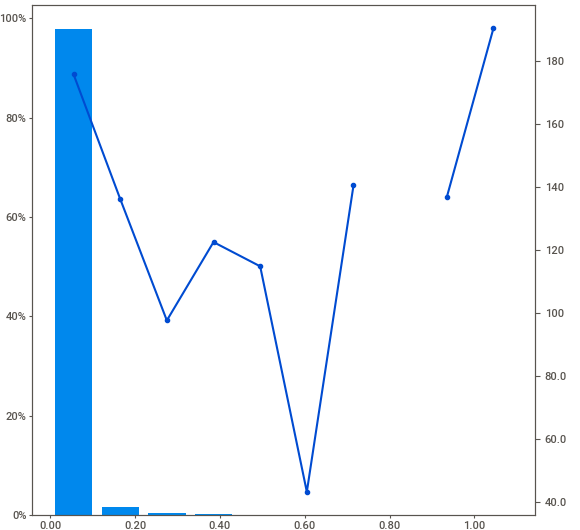
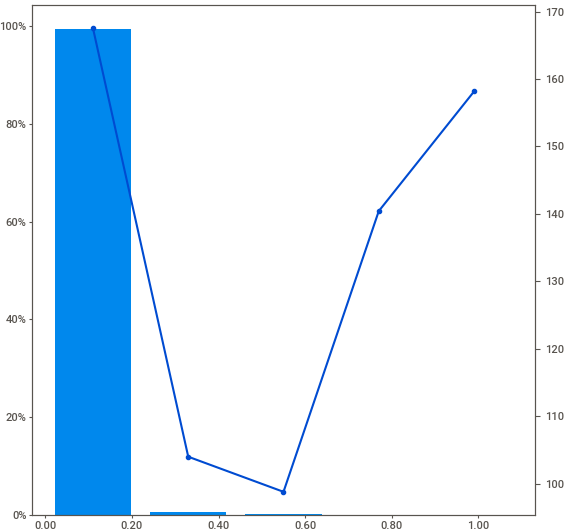
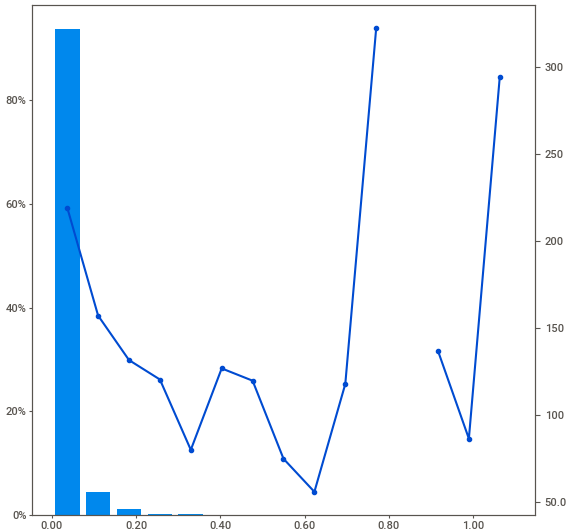
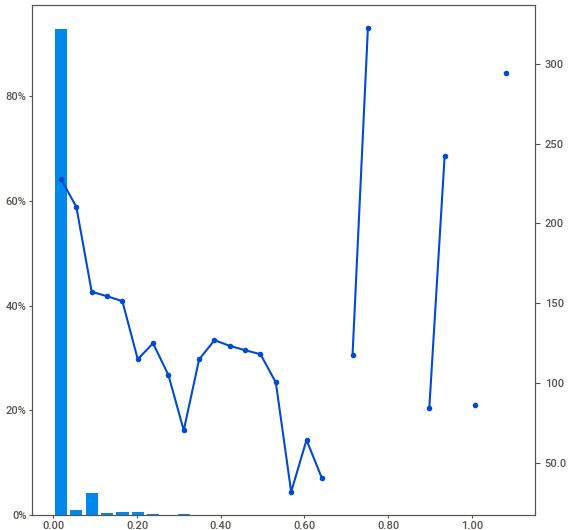
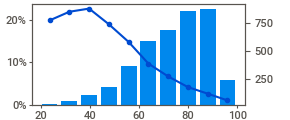
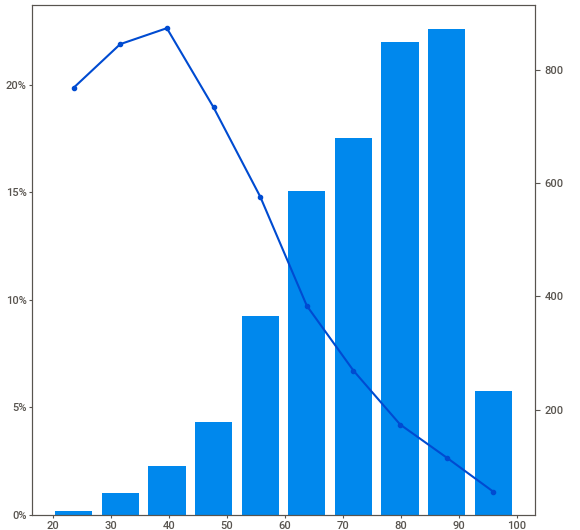
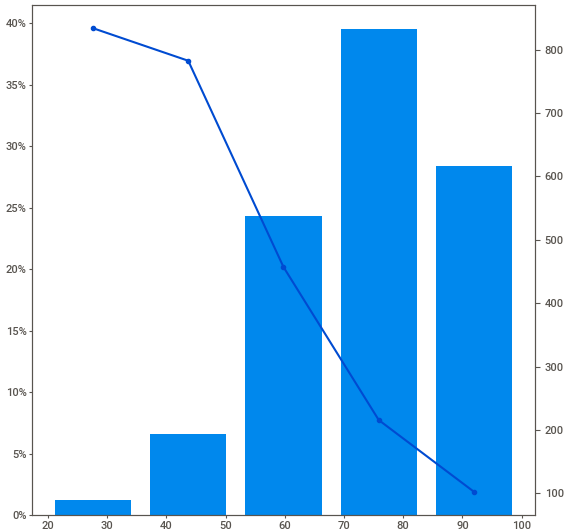
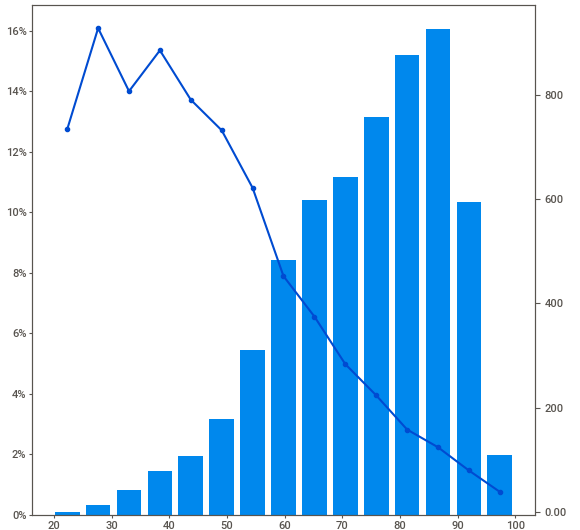
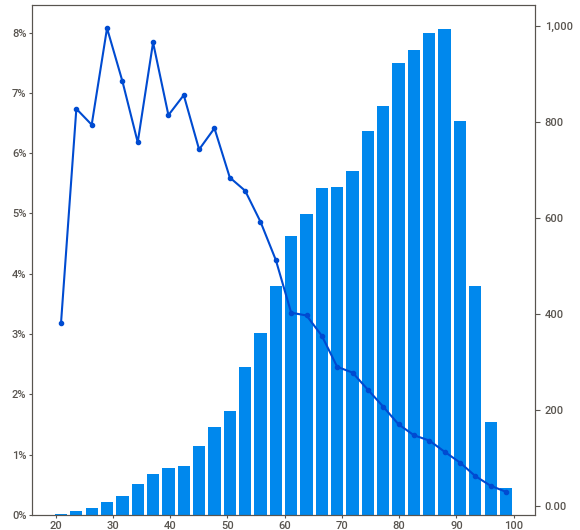
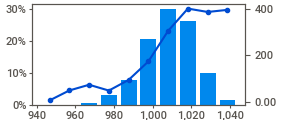
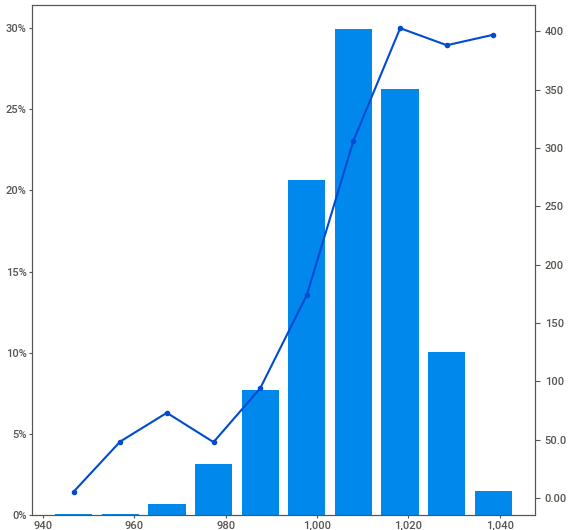
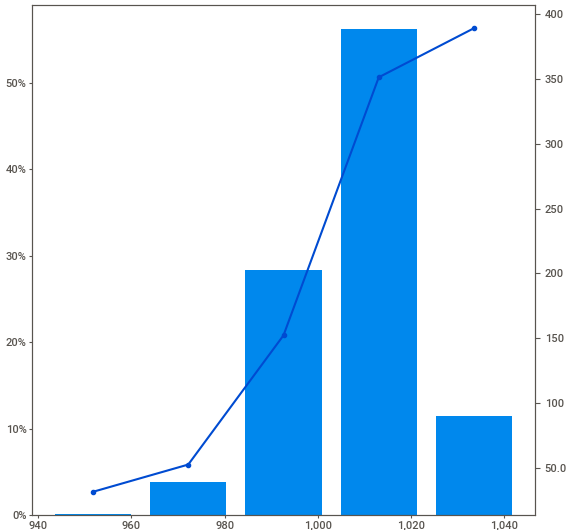
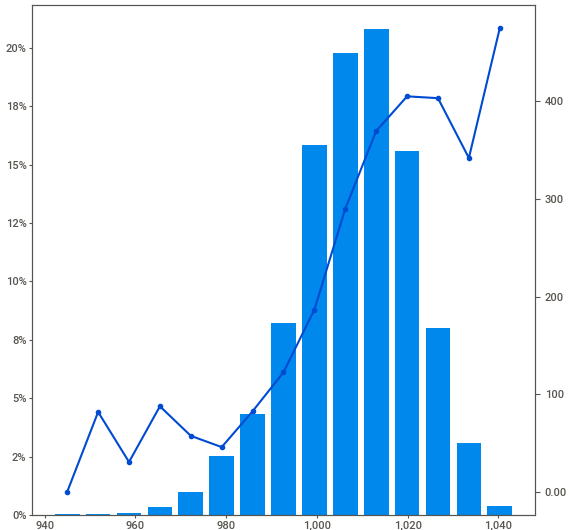
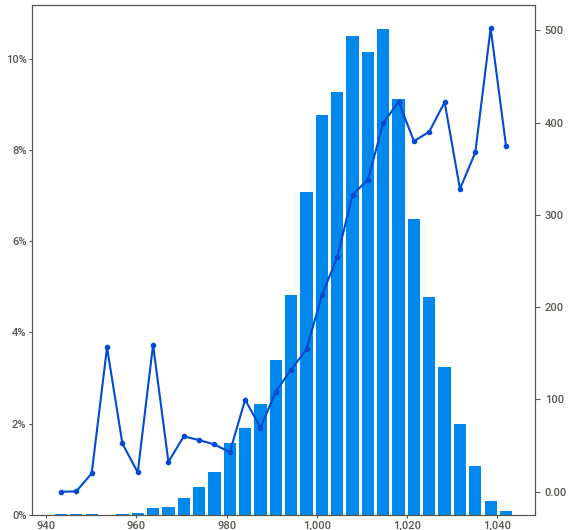
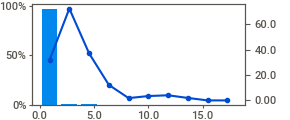
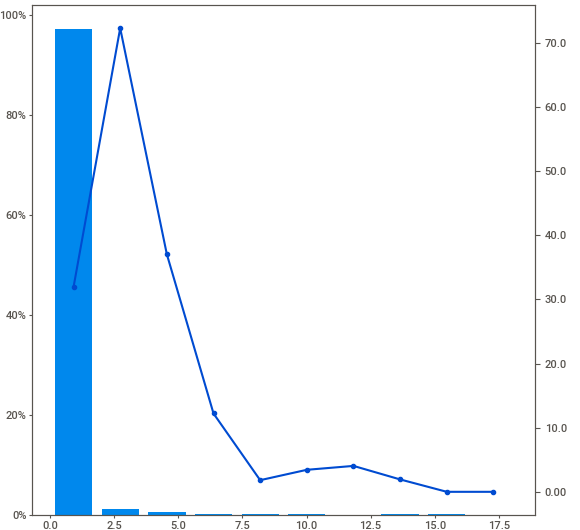
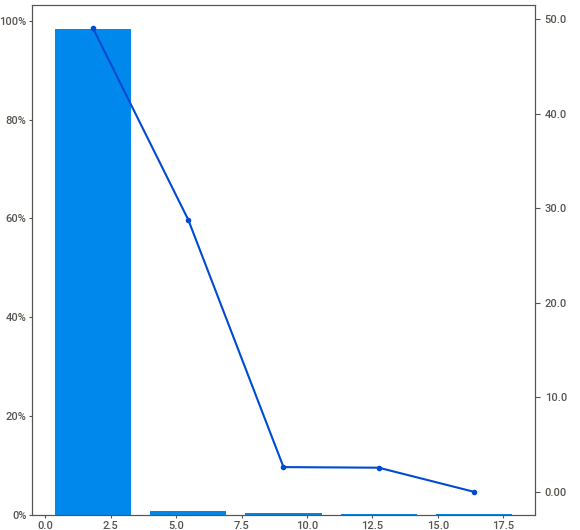
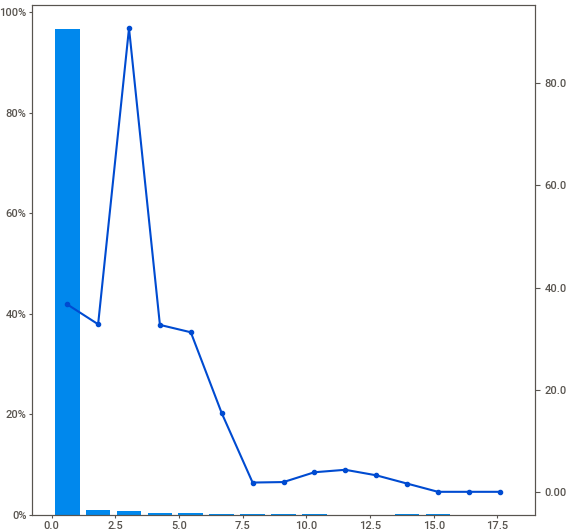
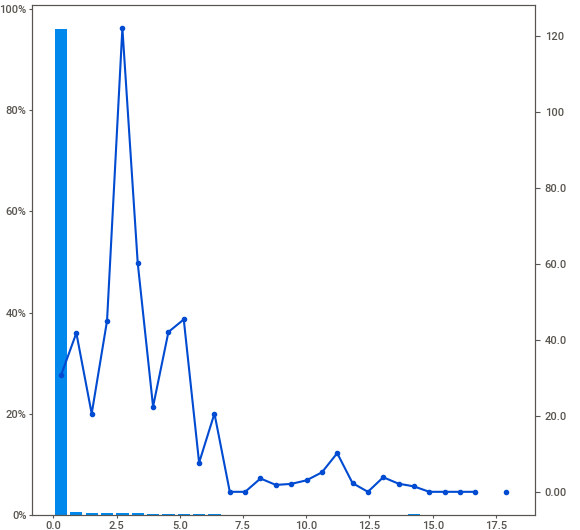
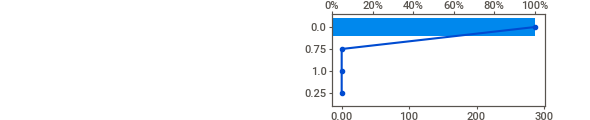
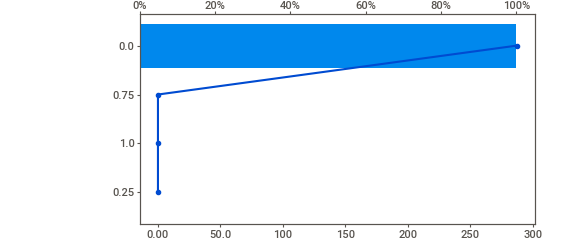
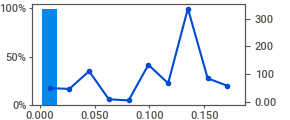
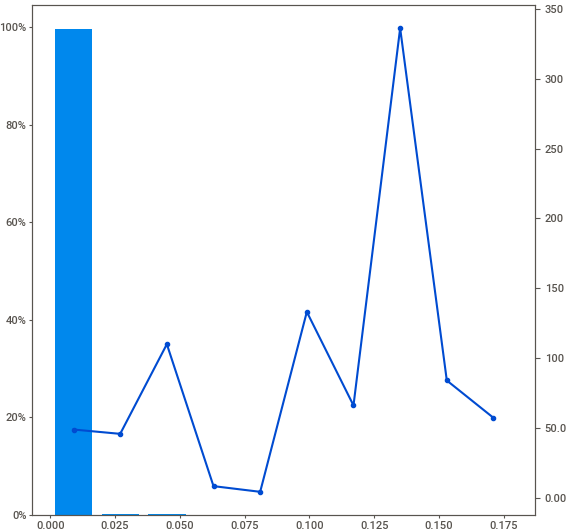
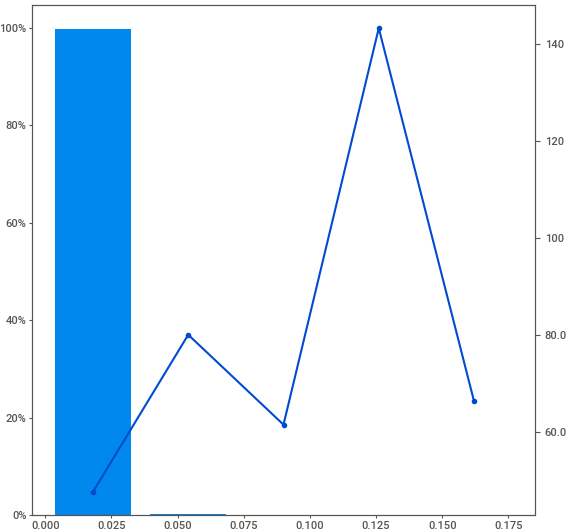
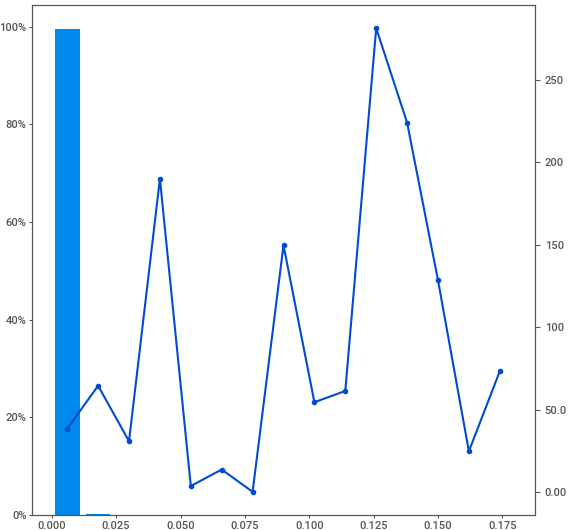
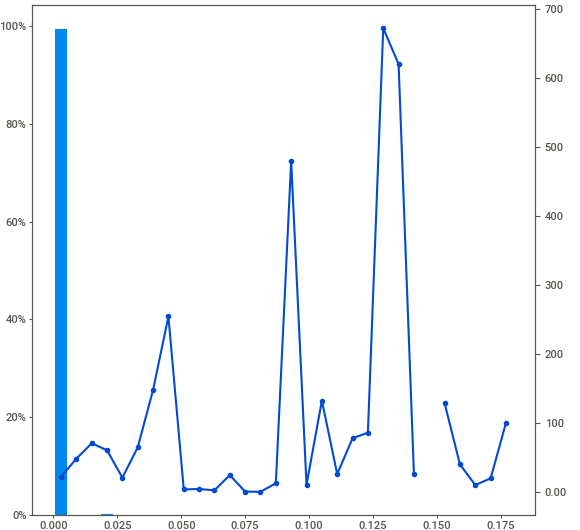
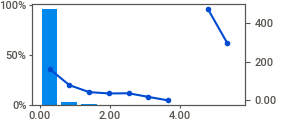
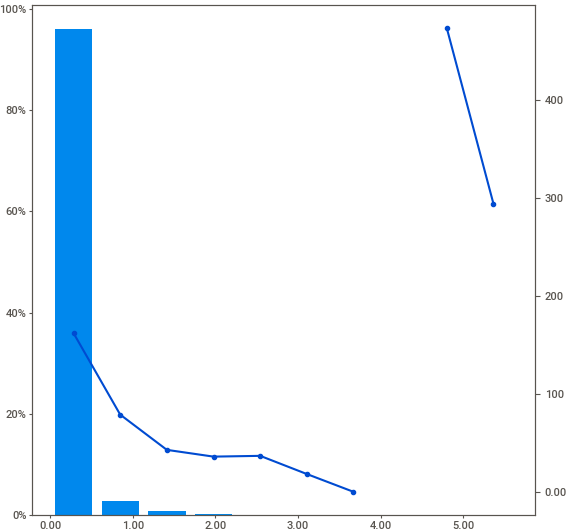
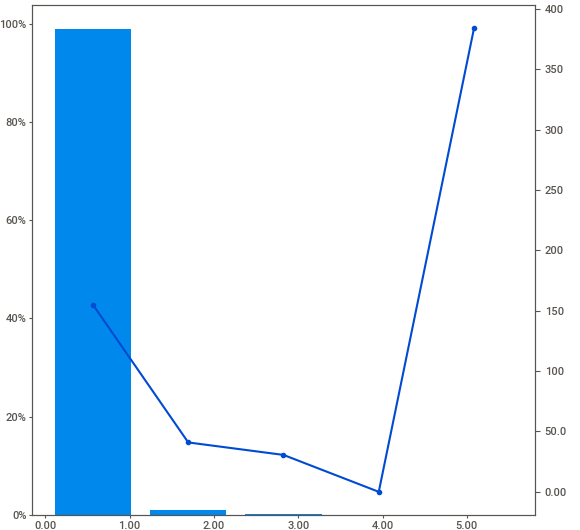
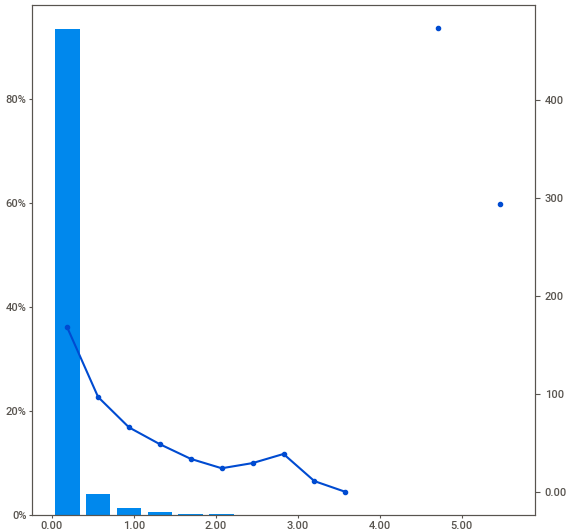
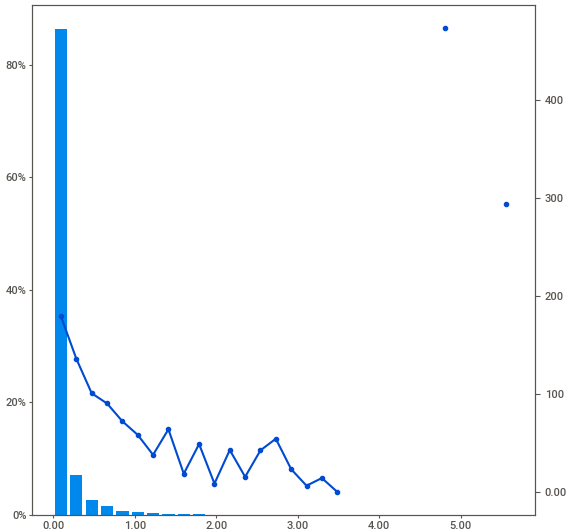
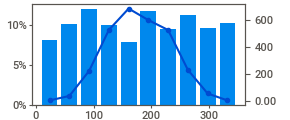
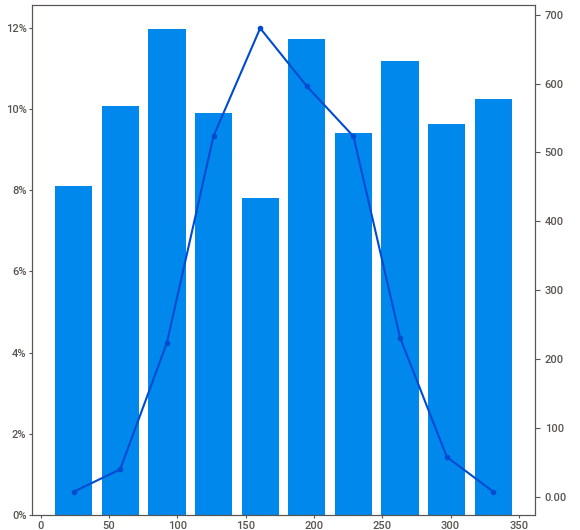
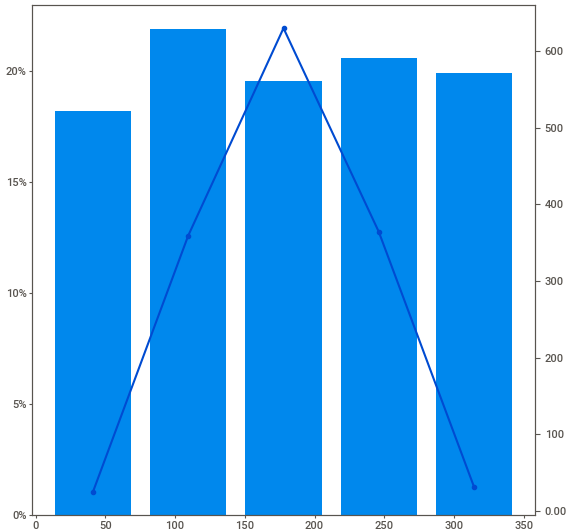
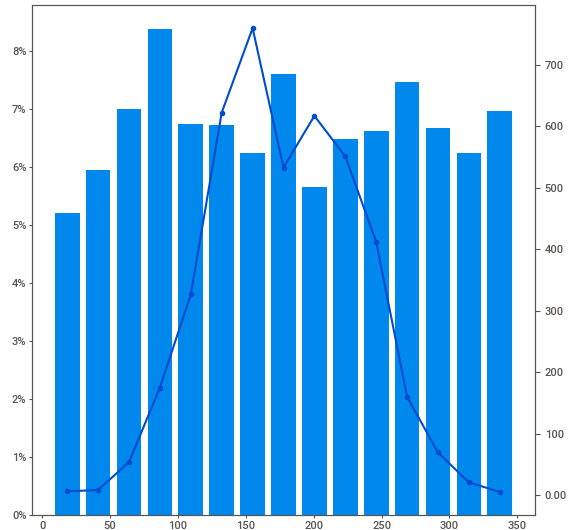
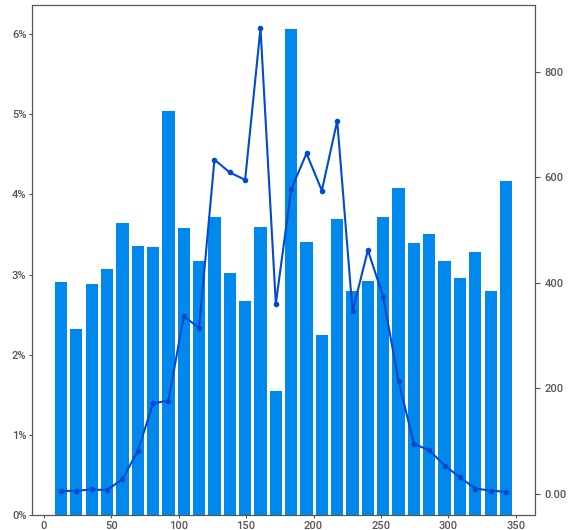
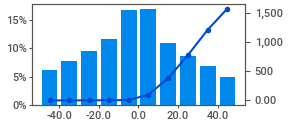
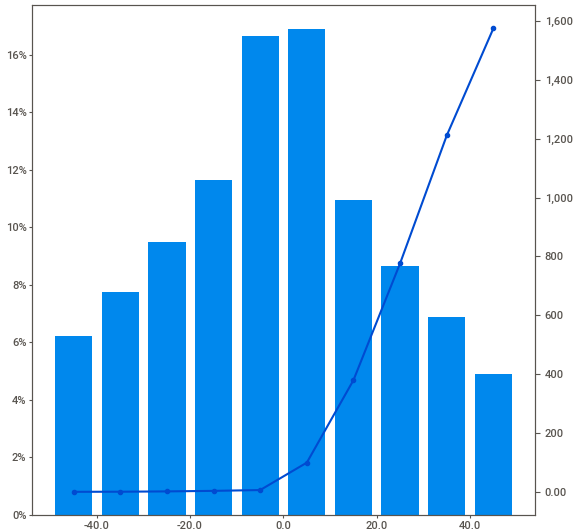
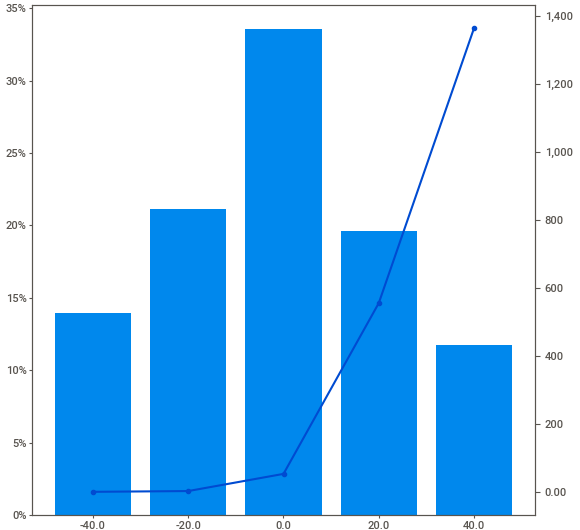
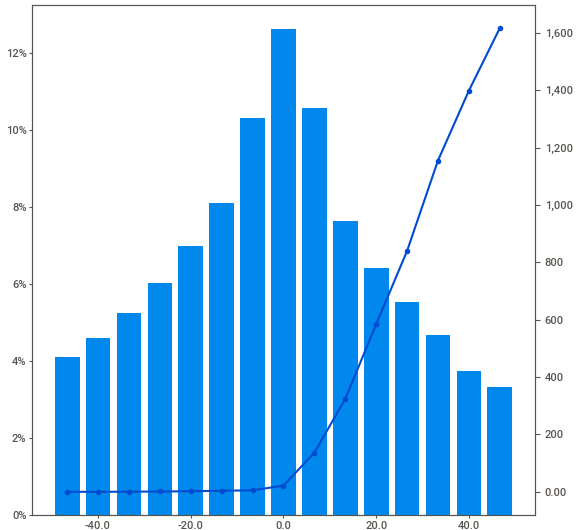
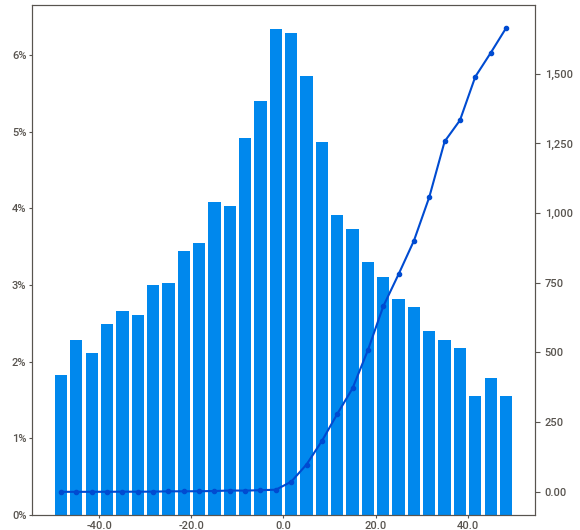
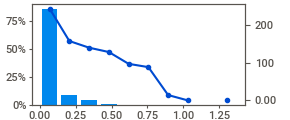
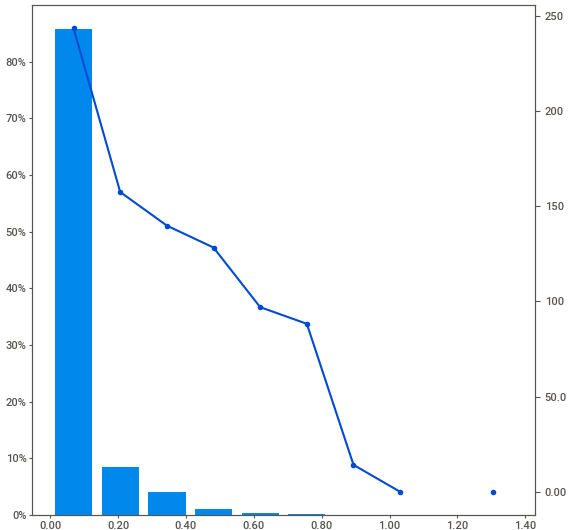
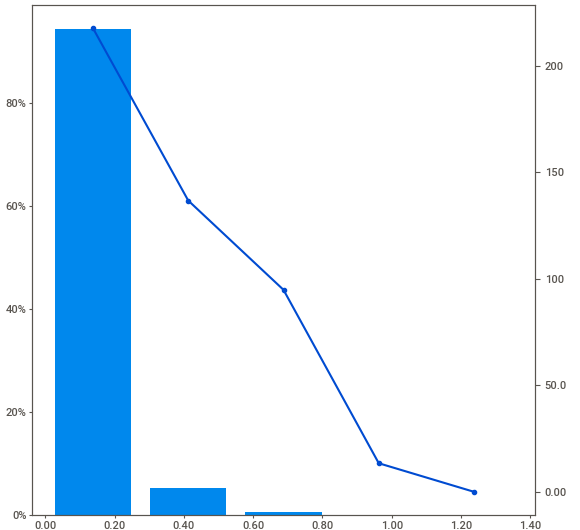
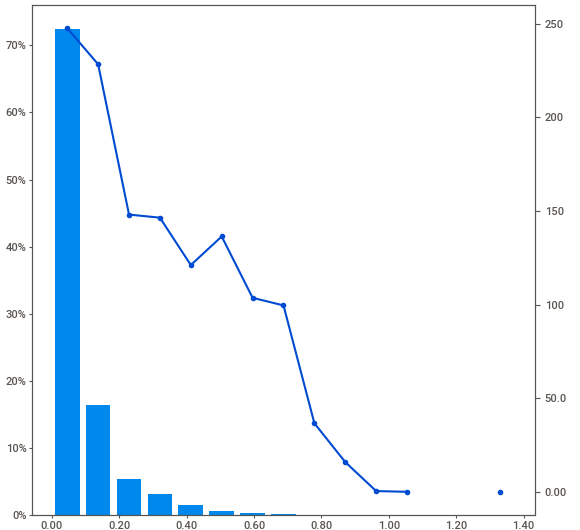
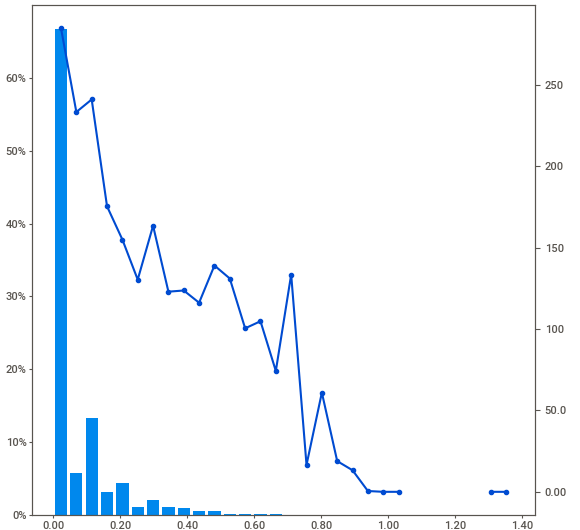
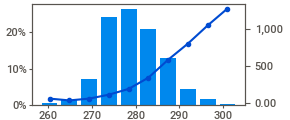
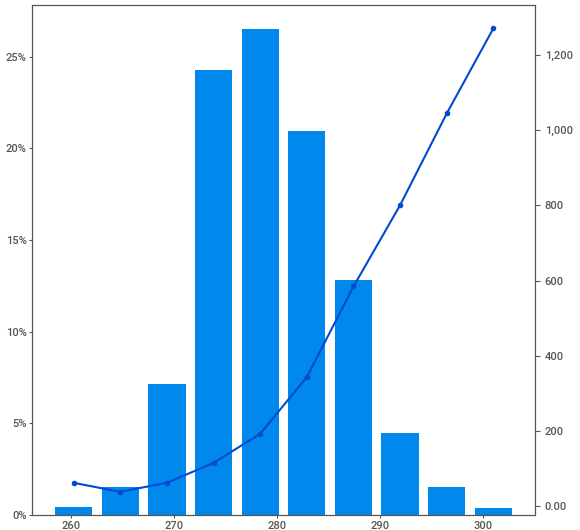
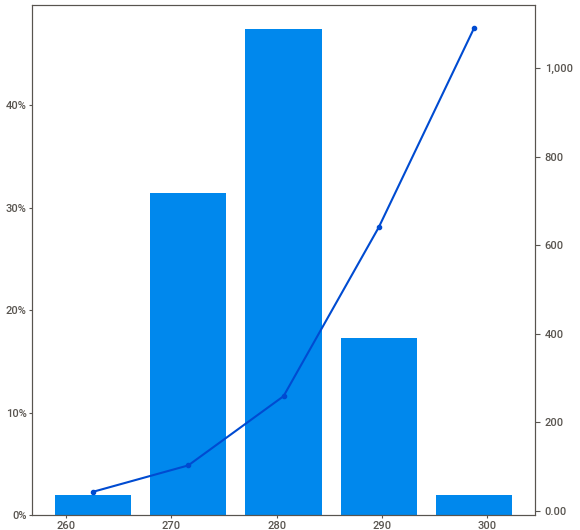
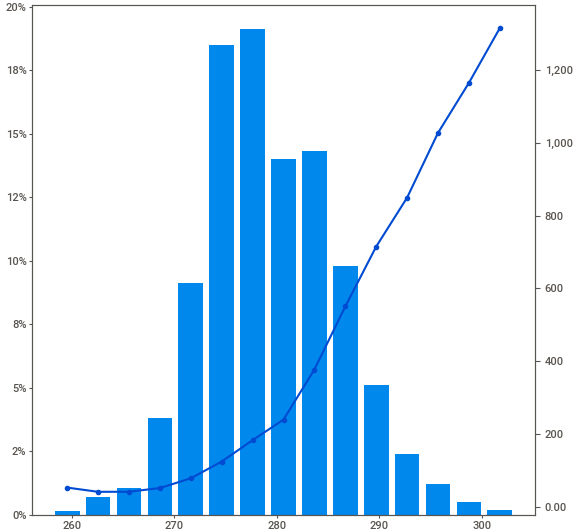
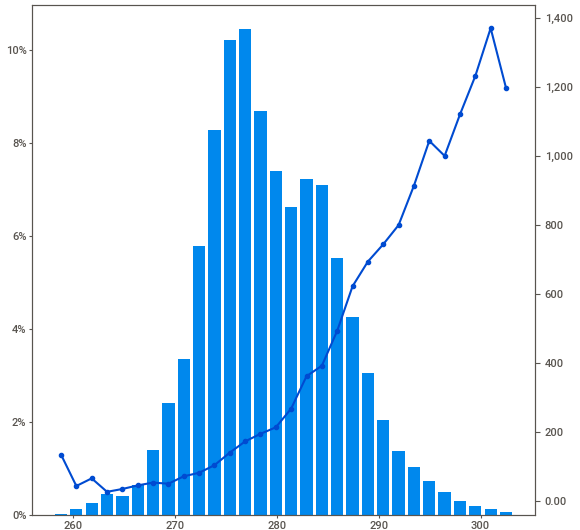
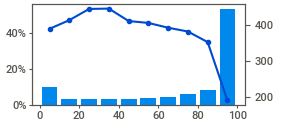
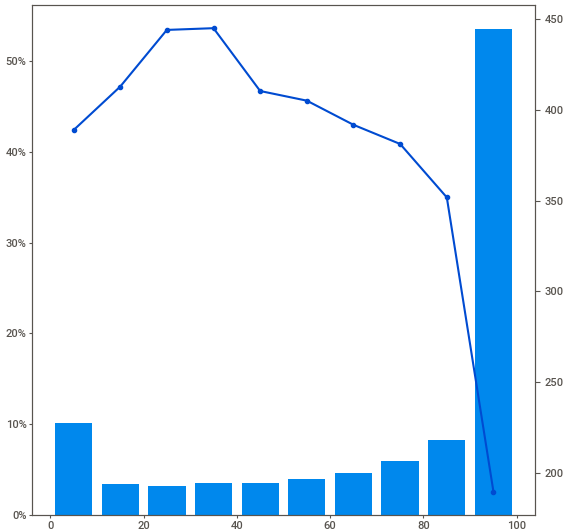
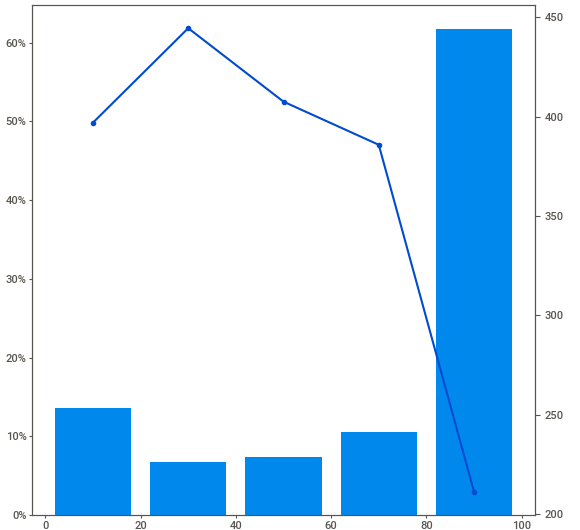
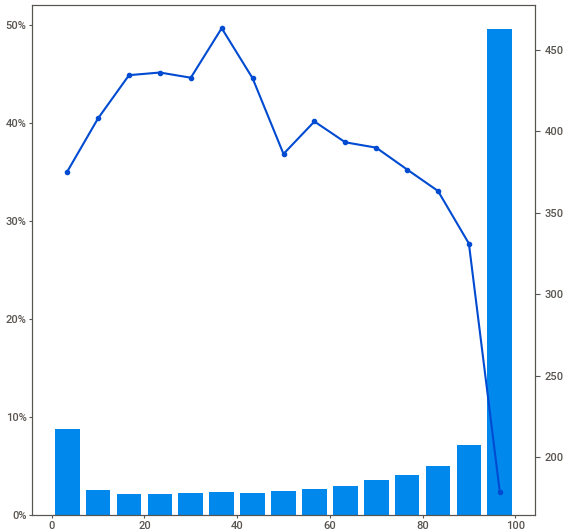
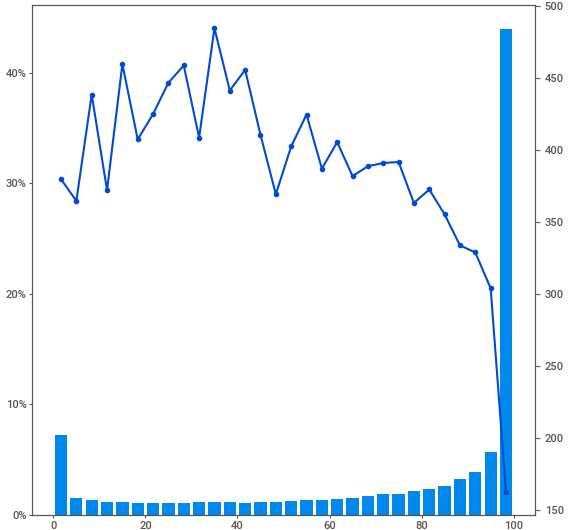
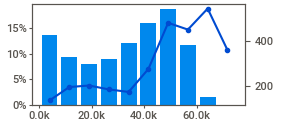
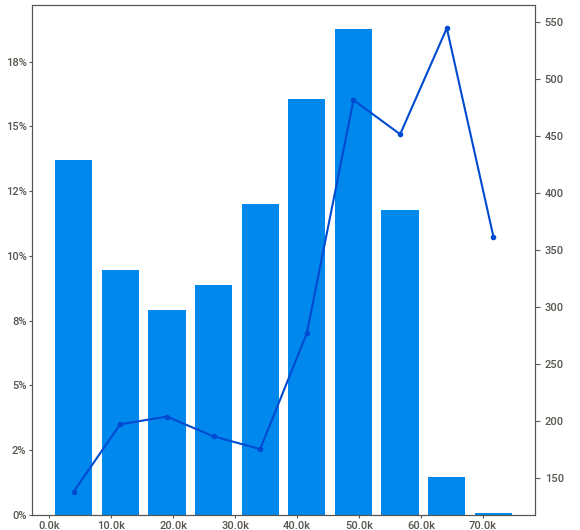
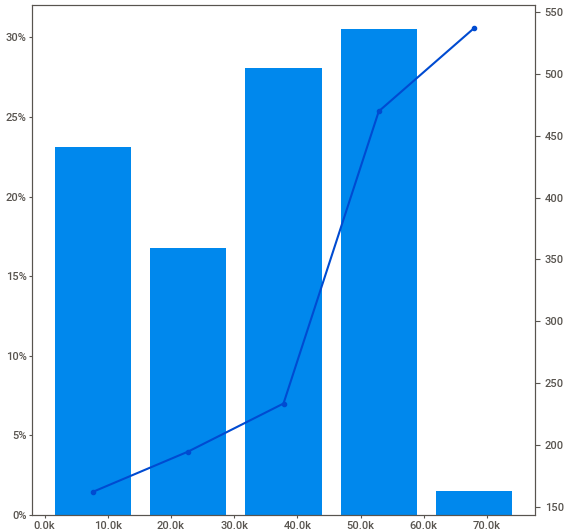
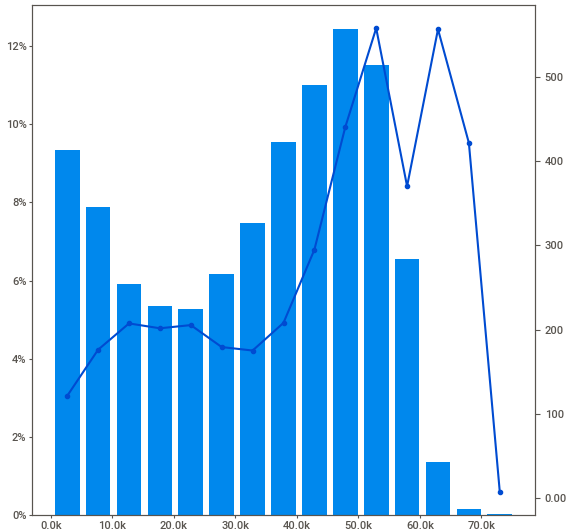
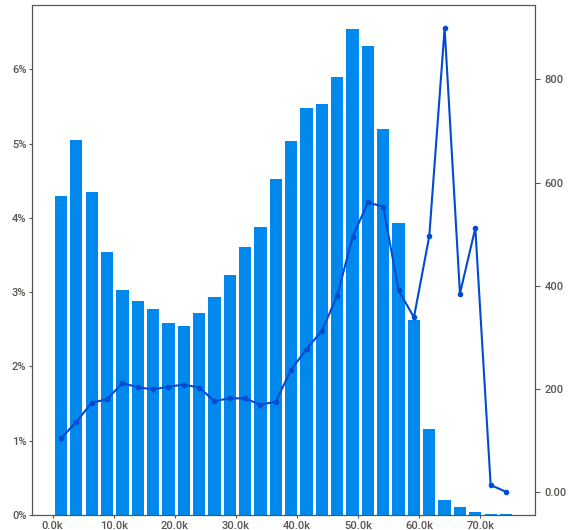
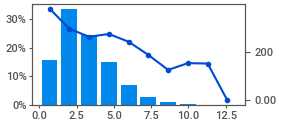
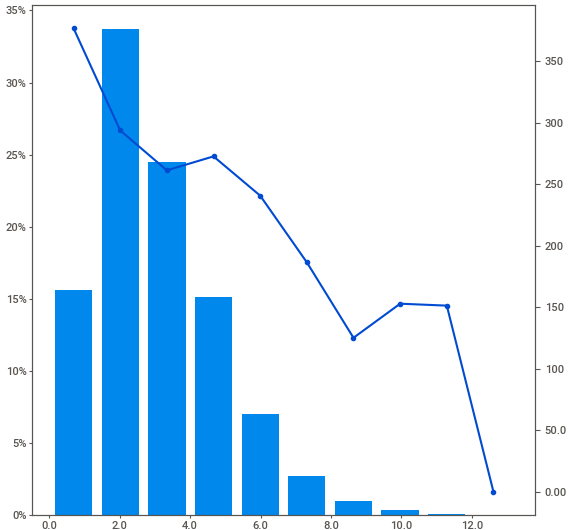
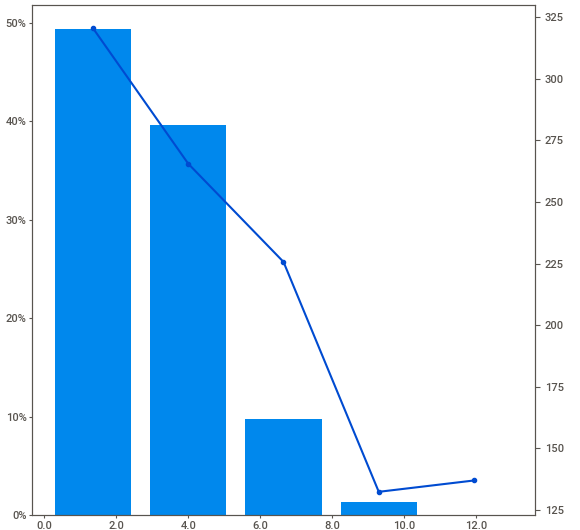
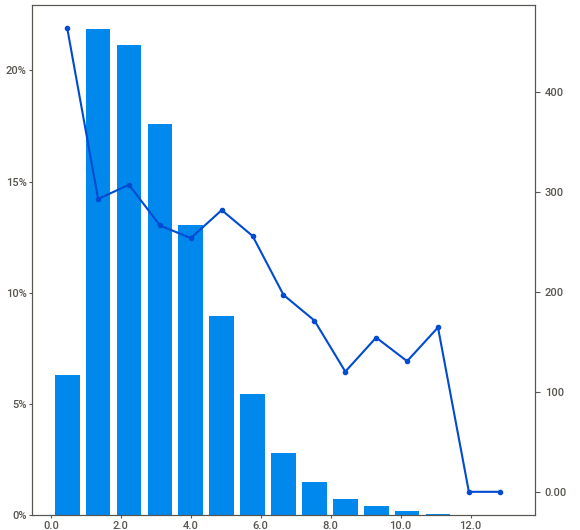
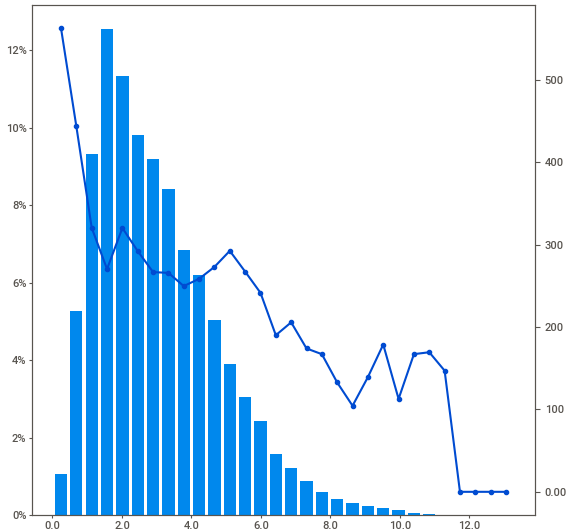
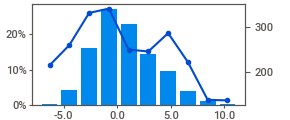
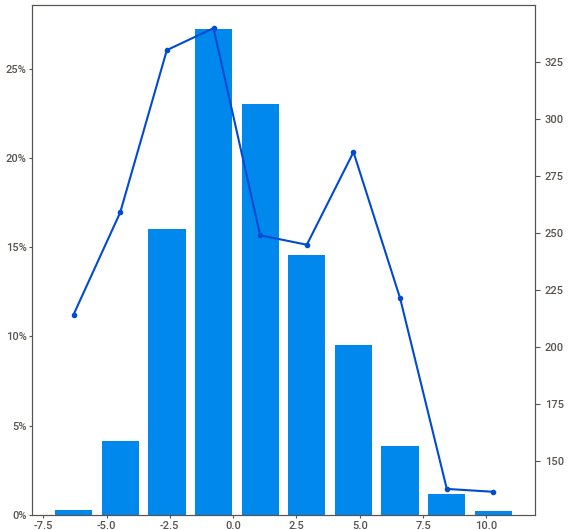
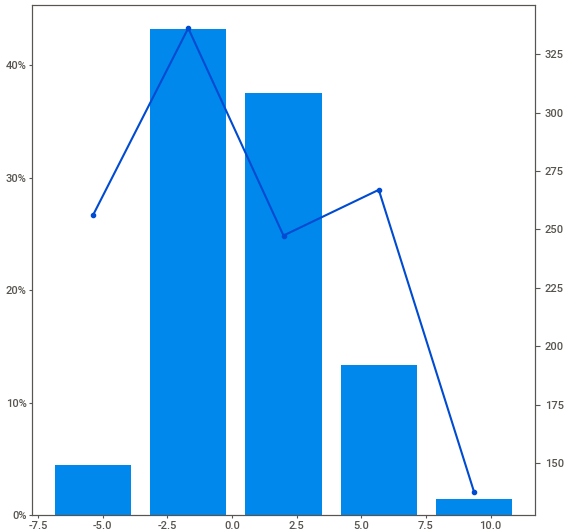
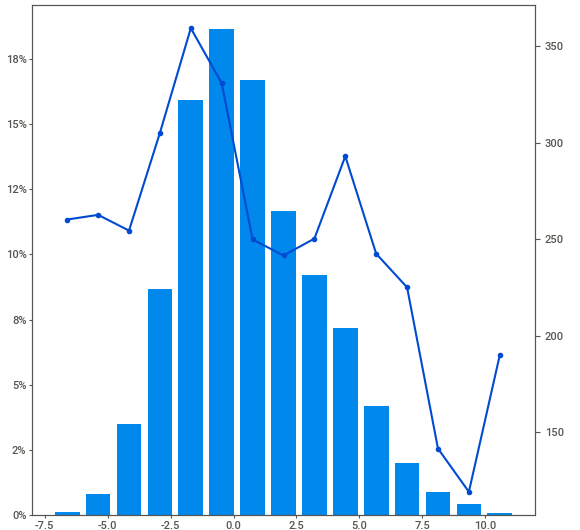
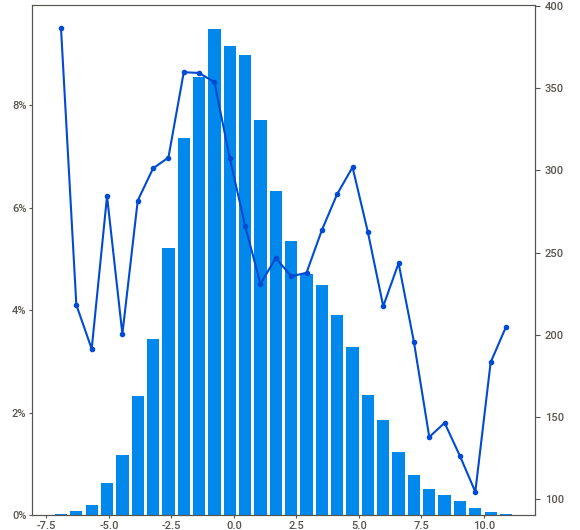
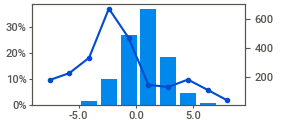
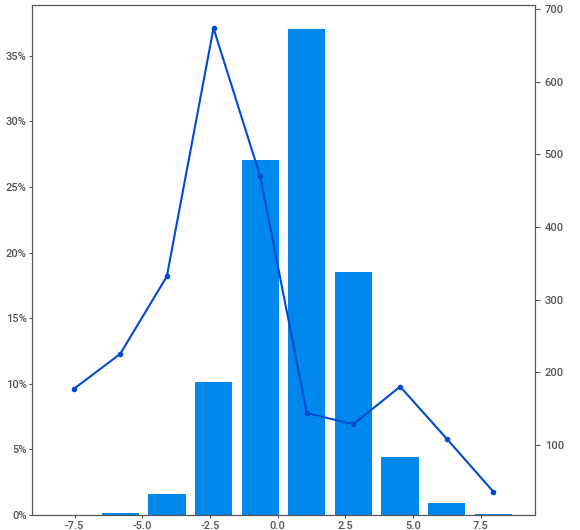
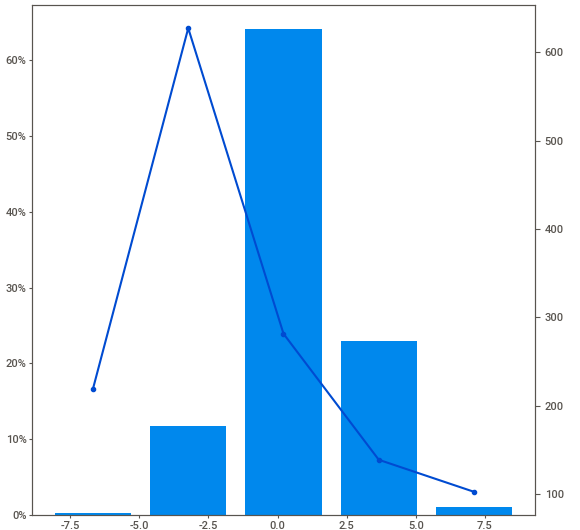
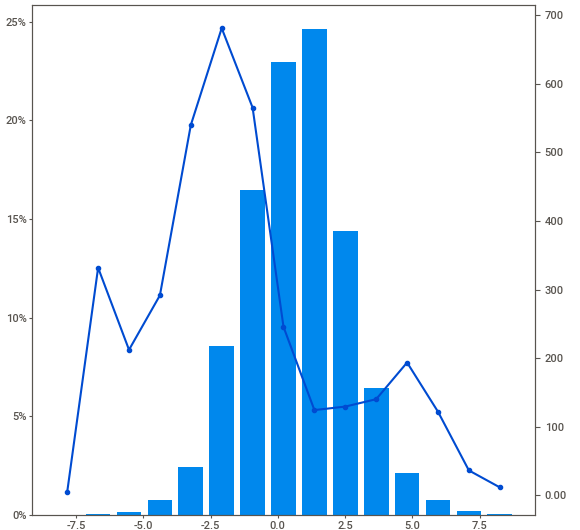
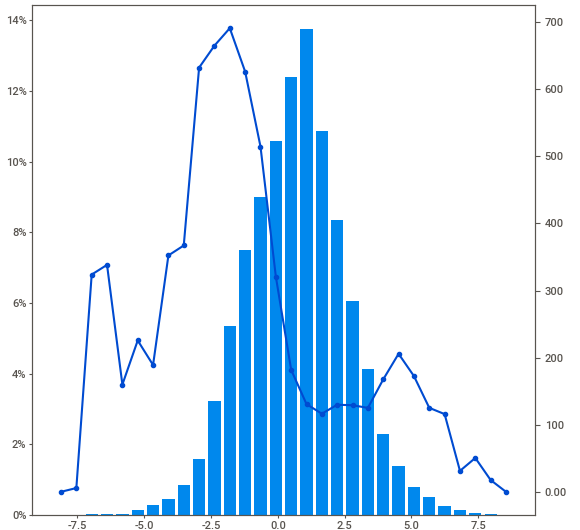
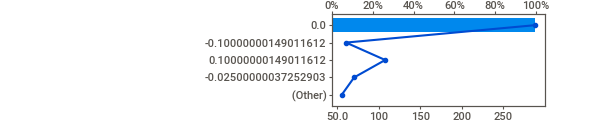
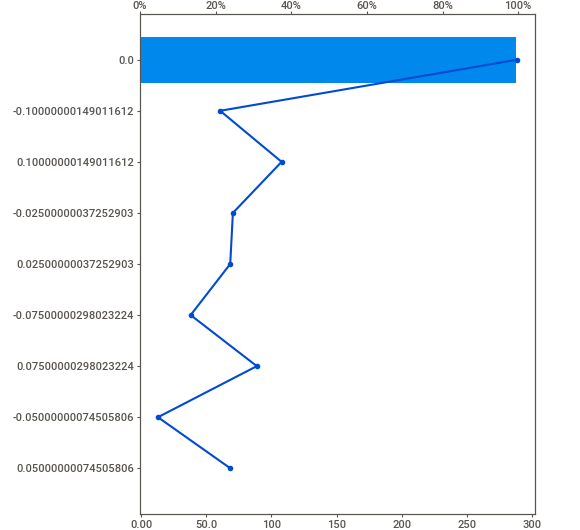
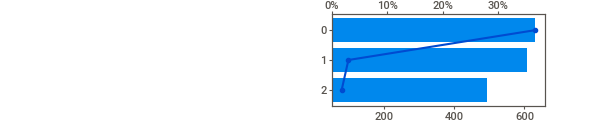
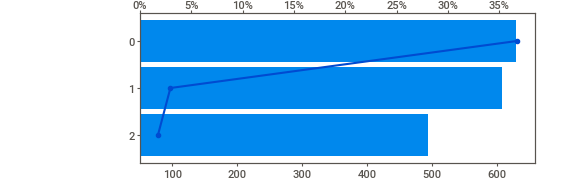
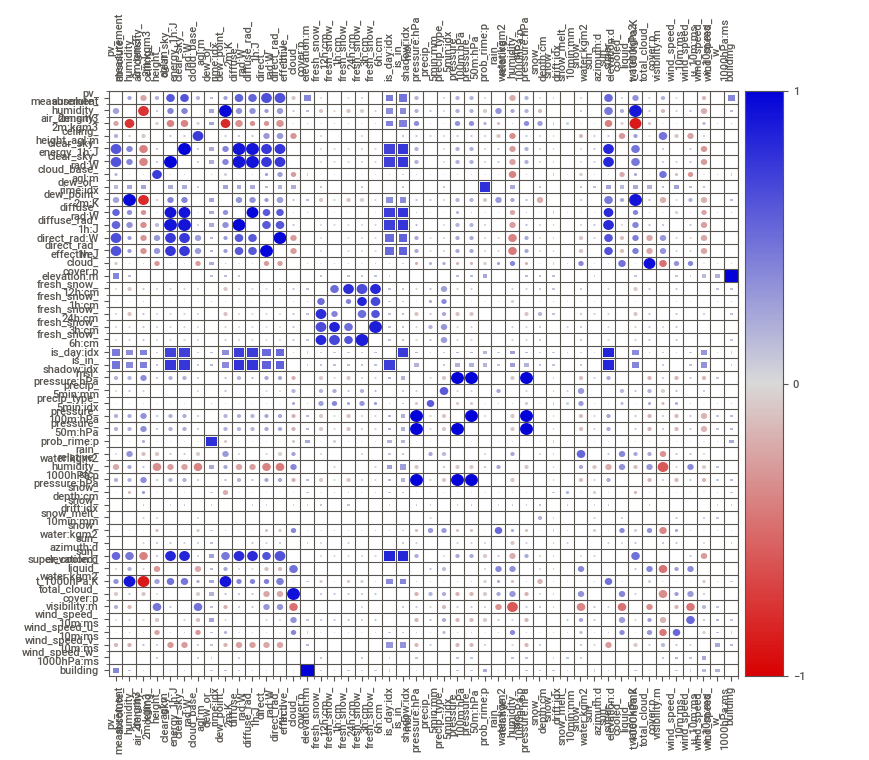
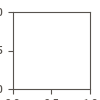

In [32]:
sv_report_mean.show_notebook()

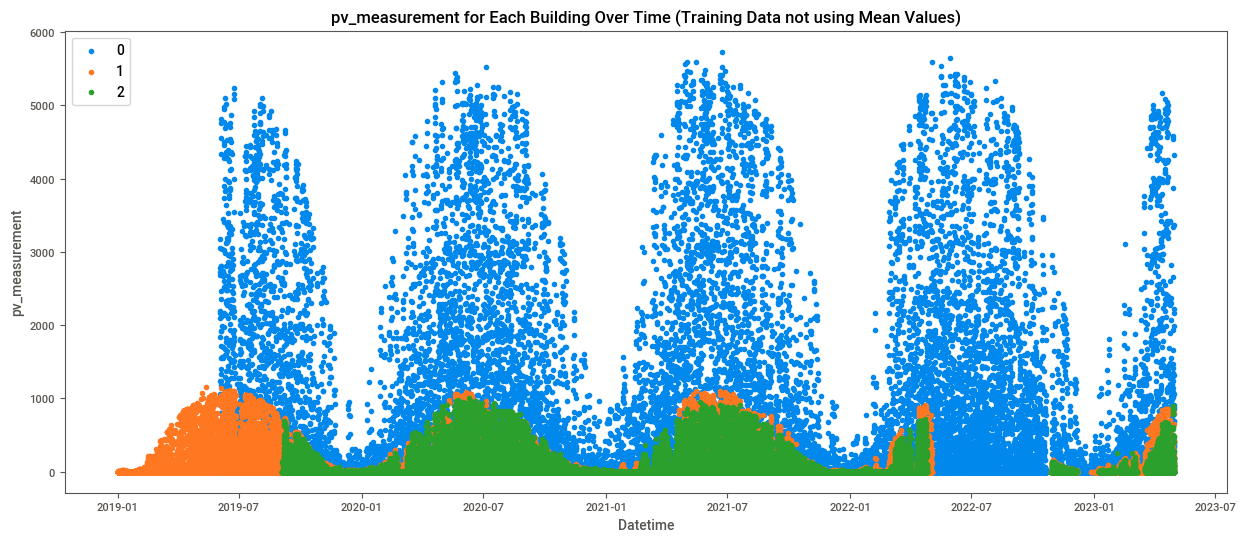

In [33]:
plt.figure(figsize=(15, 6))

for building, data in df.groupby('building'):
    plt.scatter(data.index, data['pv_measurement'], label=building, marker='o')

plt.xlabel('Datetime')
plt.ylabel('pv_measurement')
plt.title('pv_measurement for Each Building Over Time (Training Data not using Mean Values)')
plt.legend()
plt.show()

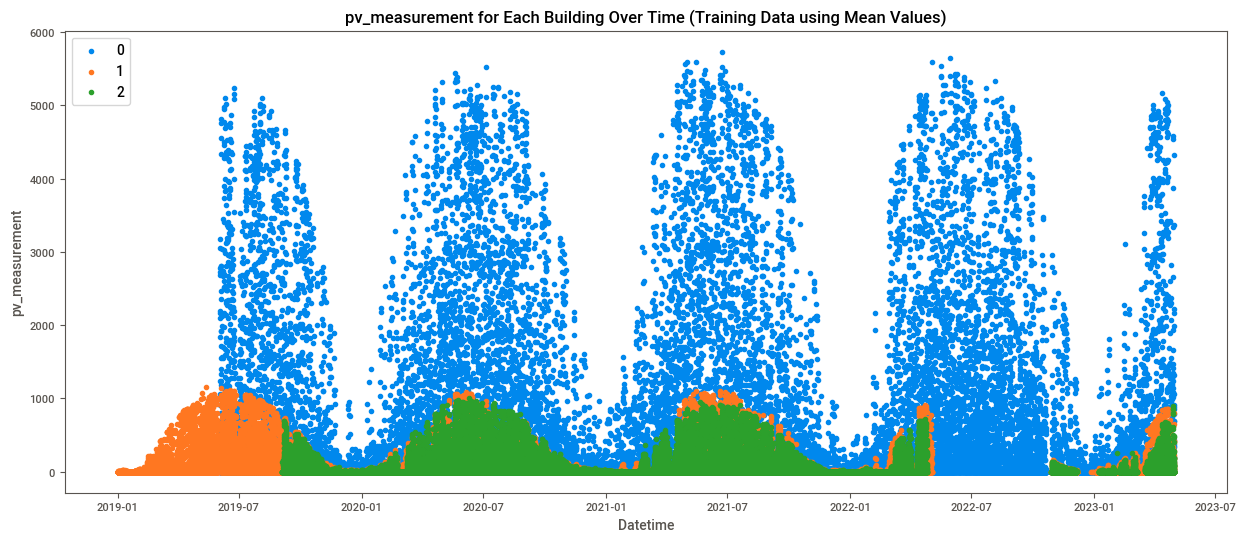

In [34]:
plt.figure(figsize=(15, 6))

for building, data in df_mean.groupby('building'):
    plt.scatter(data.index, data['pv_measurement'], label=building, marker='o')

plt.xlabel('Datetime')
plt.ylabel('pv_measurement')
plt.title('pv_measurement for Each Building Over Time (Training Data using Mean Values)')
plt.legend()
plt.show()

### Building B and C (1 and 2) seem to have a very similar distriubution while building A produces much more power.

Want to split them into two datasets and two subsequent models

In [35]:
# Make two new dataframes and X_tests named df_A, df_BC and X_test_A, X_test_BC
df_A = df[df['building'] == 0]
df_BC = df[df['building'] != 0]
df_mean_A = df_mean[df_mean['building'] == 0]
df_mean_BC = df_mean[df_mean['building'] != 0]


X_test_A = X_test[X_test['building'] == 0]
X_test_BC = X_test[X_test['building'] != 0]
X_test_mean_A = X_test_mean[X_test_mean['building'] == 0]
X_test_mean_BC = X_test_mean[X_test_mean['building'] != 0]

In [36]:
# save the dataframe as a csv file
df.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/df.csv', index=True)
df_A.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/df_A.csv', index=True)
df_BC.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/df_BC.csv', index=True)
df_mean.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/df_mean.csv', index=True)
df_mean_A.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/df_mean_A.csv', index=True)
df_mean_BC.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/df_mean_BC.csv', index=True)

In [ ]:
# save X_test to a csv file
X_test.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/X_test.csv', index=True)
X_test_A.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/X_test_A.csv', index=True)
X_test_BC.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/X_test_BC.csv', index=True)
X_test_mean.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/X_test_mean.csv', index=True)
X_test_mean_A.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/X_test_mean_A.csv', index=True)
X_test_mean_BC.to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/X_test_mean_BC.csv', index=True)

In [ ]:
# save the pv_measurement column and building to a csv file
df[['pv_measurement', 'building']].to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/y_train.csv', index=True)
df_A[['pv_measurement', 'building']].to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/y_train_A.csv', index=True)
df_BC[['pv_measurement', 'building']].to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/y_train_BC.csv', index=True)
df_mean[['pv_measurement', 'building']].to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/y_train_mean.csv', index=True)
df_mean_A[['pv_measurement', 'building']].to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/y_train_mean_A.csv', index=True)
df_mean_BC[['pv_measurement', 'building']].to_csv('/home/henrikraa/git_repos/TDT4173-ML/data_preprocessed/y_train_mean_BC.csv', index=True)